***Notebook presented by Florian Spire, Dhivin Nelson, Nicolás Arrieta and Thuany Stuart - EIT Digital***



![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

> *Source: **@allison_horst** https://github.com/allisonhorst/penguins*

# About the data

---
The data was collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

It contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

# Analysis goal

---
As our dataset contains data for several penguins belonging to 3 different species, our goal will be to produce a model able **to classify the penguins into three different species**. 

In this notebook we will first focus on **data description** to get a first overview of our data. From there, we will proceed with **feature selection** *- that is to choose which features to keep or not -* and we will **clean the data** to make our data exploitable. Then, we will focus on **data exploration and visualization** in order to understand better the data we will have to analyze. The last step before starting the model building is to **encode and to normalize the data**.

# Data and libraries imports

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats

install.packages("icesTAF")
install.packages("FSelector")
library(dplyr)
library(tidyverse) # metapackage of all tidyverse packages
library(colorspace)
library(FSelector)
library(caret)
library(RColorBrewer)
library(icesTAF)
library(corrgram)
library(corrplot)
library(MASS)
library(hexbin)
library(caTools)
library(factoextra)
library(ggfortify)
library(e1071)
library(rpart)
library(rpart.plot)
library(rattle) # plot decision trees

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘RWeka’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Input data files are available in the read-only "../input/" directory. For example, running the next cell will list all the files under the input directory.

In [2]:
list.files(path = "../input")

[1] "palmer-archipelago-antarctica-penguin-data"

We can see that the Palmar Penguins dataset is already in the input folder. We read the Palmar Penguins dataset from a `.csv` file in the input folder to an R data frame. We consider the empty cells or the cells with just a point as missing values (*NA*).

In [3]:
data <- read.csv("../input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv", header=T, na.strings=c("","."))

# Data Preprocessing
---
Before modelling our dataset, we will pre process it to understand the data, make it suitable for the modelling and making sure that we are extracting the most information from it.

We will go through the following steps:
* Data Description
* Data Reduction
* Data Cleaning
* Data Exploration and Visualization
* Data Transformation

We prefer to do the data visualization after the reduction and cleaning because then we can focus on the features that are relevant for the problem and not have to deal with missing data. If the data visualization reveals that some features are not relevant for the analysis, we might perform data reduction again. Because the data transformation will change the scales of the features, we do the visualization before it, so we can analyse the data in its measured units.

## Data Description
---

Firstly, we collect some general informations about the dataset to understand the data.

We check the number of samples and features in the dataset with `ncol` and `nrow` functions.

In [4]:
sprintf("The dataset contains %d columns (features) and %d rows (samples)", ncol(data), nrow(data))

[1] "The dataset contains 17 columns (features) and 344 rows (samples)"

We print the name of the dataset's columns.

In [5]:
colnames(data)

[1] "studyName"           "Sample.Number"       "Species"            
 [4] "Region"              "Island"              "Stage"              
 [7] "Individual.ID"       "Clutch.Completion"   "Date.Egg"           
[10] "Culmen.Length..mm."  "Culmen.Depth..mm."   "Flipper.Length..mm."
[13] "Body.Mass..g."       "Sex"                 "Delta.15.N..o.oo."  
[16] "Delta.13.C..o.oo."   "Comments"

The `head` function prints the first rows of the dataset. We use it to get a feeling of how the dataset loks like and check the type of each column.

In [6]:
head(data)

studyName Sample.Number Species                             Region Island   
1 PAL0708   1             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
2 PAL0708   2             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
3 PAL0708   3             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
4 PAL0708   4             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
5 PAL0708   5             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
6 PAL0708   6             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
  Stage              Individual.ID Clutch.Completion Date.Egg
1 Adult, 1 Egg Stage N1A1          Yes               11/11/07
2 Adult, 1 Egg Stage N1A2          Yes               11/11/07
3 Adult, 1 Egg Stage N2A1          Yes               11/16/07
4 Adult, 1 Egg Stage N2A2          Yes               11/16/07
5 Adult, 1 Egg Stage N3A1          Yes               11/16/07
6 Adult, 1 Egg Stage N3A2          Yes               11/16/07
  Culmen.Length..mm. Culmen.Depth..mm. Flipper.Length..mm. Body.Mass..g. Sex   
1 39.1               18.7              181                 3750          MALE  
2 39.5               17.4              186                 3800          FEMALE
3 40.3               18.0              195                 3250          FEMALE
4   NA                 NA               NA                   NA          NA    
5 36.7               19.3              193                 3450          FEMALE
6 39.3               20.6              190                 3650          MALE  
  Delta.15.N..o.oo. Delta.13.C..o.oo. Comments                      
1      NA                  NA         Not enough blood for isotopes.
2 8.94956           -24.69454         NA                            
3 8.36821           -25.33302         NA                            
4      NA                  NA         Adult not sampled.            
5 8.76651           -25.32426         NA                            
6 8.66496           -25.29805         NA

`Summary` function gives us an overview of the different features and their type and contents.

In [7]:
summary(data)

   studyName   Sample.Number                                         Species   
 PAL0708:110   Min.   :  1.00   Adelie Penguin (Pygoscelis adeliae)      :152  
 PAL0809:114   1st Qu.: 29.00   Chinstrap penguin (Pygoscelis antarctica): 68  
 PAL0910:120   Median : 58.00   Gentoo penguin (Pygoscelis papua)        :124  
               Mean   : 63.15                                                  
               3rd Qu.: 95.25                                                  
               Max.   :152.00                                                  
                                                                               
    Region          Island                   Stage     Individual.ID
 Anvers:344   Biscoe   :168   Adult, 1 Egg Stage:344   N13A1  :  3  
              Dream    :124                            N13A2  :  3  
              Torgersen: 52                            N18A1  :  3  
                                                       N18A2  :  3  
               

To summarize, our dataset contains **344 samples** and **17 features**:

* **3 discrete features (numerical):** 
    * SampleNumber
    * Date Egg
    * Individual ID
* **6 continuous features (numerical):**
    * Culmen Length (mm)
    * Culmen Depth (mm)
    * Flipper Length (mm)
    * Body Mass (g)
    * Delta 15 N (o/oo) - The ratio of isotope $\delta^{15}$N
    * Delta 13 C (o/oo) - The ratio of isotope $\delta^{13}$C
* **5 nominal features (categorical):**
    * StudyName
    * Region
    * Island (Dream, Torgersen, or Biscoe)
    * Species (Chinstrap, Adélie, or Gentoo)
    * Stage
* **2 binary features (categorical):**
    * Sex (male or female)
    * Clutch Completion (yes or no)

The last column of our dataset contains some **textual comments** for a few penguins in our dataset.

## Data Reduction

The summary reveals some interesting elements such as the fact that some features like *stage* and *region* are the same for all our samples. Hence, we already know that these specific features cannot be used to classify anything in our data. Therefore, we can drop these two features.

In [8]:
data = data[, !(colnames(data) %in% c("Region","Stage"))]

The *comments* feature is not exploitable as such in our analysis because it is manual text comments. Most of the comments refer to missing data for certain individuals, in particular missing data about the isotopes and sex. The missing data will be dealt with in the data cleaning, therefore, we can now drop the *comments* feature.

In [9]:
data = data[, !(colnames(data) %in% c("Comments"))]

We can also directly drop a certain number of features useless for us and not related with our analyzis. Indeed, we obviously don't need the *study name, sample number, date egg and individual ID*.

In [10]:
data = data[, !(colnames(data) %in% c("studyName","Sample.Number", "Date.Egg", "Individual.ID"))]

### Feature Selection

We will now evaluate the importance of each feature responsible for the determination of the specie. For that we can use the `information.gain` function based on an algorithm which find ranks of importance by measuring the reduction in entropy before and after a transformation. The higher the score the more important the feature will be.

In [11]:
importance <- information.gain(Species~., data)
importance

attr_importance
Island              0.520157171    
Clutch.Completion   0.012627281    
Culmen.Length..mm.  0.544896584    
Culmen.Depth..mm.   0.538718879    
Flipper.Length..mm. 0.594506600    
Body.Mass..g.       0.483063863    
Sex                 0.007244168    
Delta.15.N..o.oo.   0.445288250    
Delta.13.C..o.oo.   0.559650835

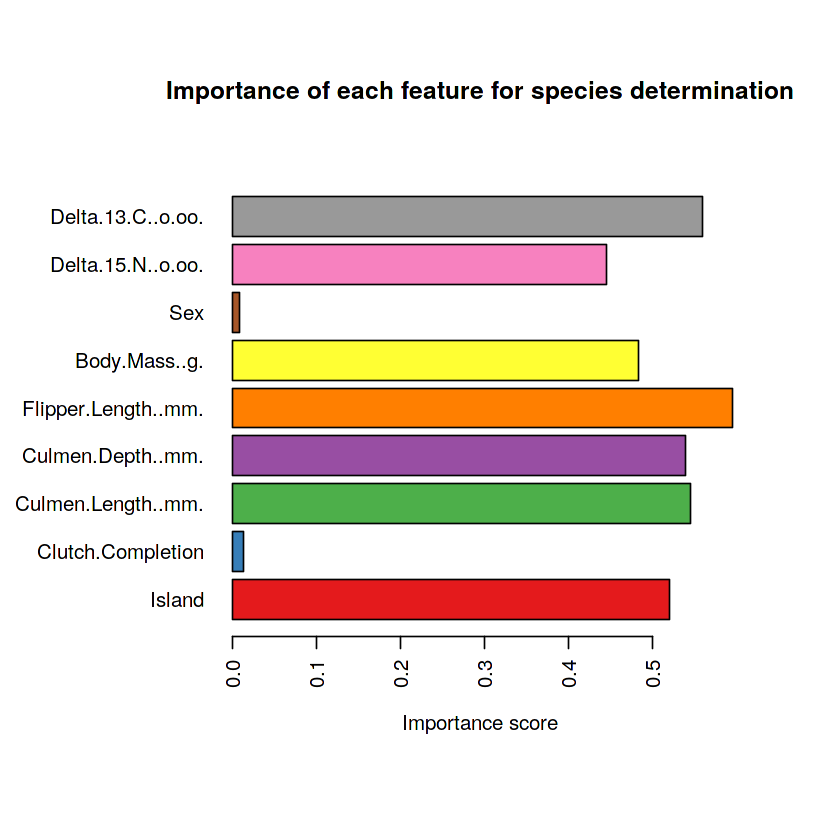

In [12]:
par(mar=c(5,6,4,1)+3.5) #Margin for the graph
barplot(importance[,1], main="Importance of each feature for species determination", xlab="Importance score", names=rownames(importance), 
        col=brewer.pal(9, "Set1"),
        horiz=T, las=2)

We can see very clearly that the determination of the specie is almost unaffected by the features *Sex* and *Clutch Completion*. Therefore, we decide to drop these columns as they will not be useful for our classification.

In [13]:
data = data[, !(colnames(data) %in% c("Sex", "Clutch.Completion"))]

Lastly, we make the dataset more readible by:
- Converting the body mass to kg
- Renaming the remaining columns
- Simplifying the name of the species

In [14]:
data <- div(data, c("Body.Mass..g."),1000) #Conversion to kilograms

In [15]:
colnames(data) <- c("Species", "Island", "Culmen Length [mm]", "Culmen Depth [mm]", "Flipper Length [mm]", "Body Mass [kg]", "Delta 15 N", "Delta 13 C")

In [16]:
levels(data$Species)[match("Adelie Penguin (Pygoscelis adeliae)",levels(data$Species))] <- "Adelie"
levels(data$Species)[match("Chinstrap penguin (Pygoscelis antarctica)",levels(data$Species))] <- "Chinstrap"
levels(data$Species)[match("Gentoo penguin (Pygoscelis papua)",levels(data$Species))] <- "Gentoo"

Finally, we take a look at the dataset after data reduction.

In [17]:
data[sample(nrow(data), 5), ]

Species   Island    Culmen Length [mm] Culmen Depth [mm]
102 Adelie    Biscoe    41.0               20.0             
205 Chinstrap Dream     45.7               17.3             
1   Adelie    Torgersen 39.1               18.7             
314 Gentoo    Biscoe    49.5               16.1             
334 Gentoo    Biscoe    51.5               16.3             
    Flipper Length [mm] Body Mass [kg] Delta 15 N Delta 13 C
102 203                 4.725          9.01079    -26.38085 
205 193                 3.600          9.41500    -24.80500 
1   181                 3.750               NA           NA 
314 224                 5.650          8.83352    -25.69195 
334 230                 5.500          8.78557    -25.76147

## Data cleaning

Now that we have selected all the features we want to keep, we have to handle what to do with the remaining missing data so let's print the number of missing values for each attribute in our dataset.

In [18]:
na_count <-sapply(data, function(y) sum(length(which(is.na(y)))))
data.frame(na_count)

na_count
Species              0      
Island               0      
Culmen Length [mm]   2      
Culmen Depth [mm]    2      
Flipper Length [mm]  2      
Body Mass [kg]       2      
Delta 15 N          14      
Delta 13 C          13

We can see that most of our missing data are about the isotopes measurements, Delta 15 N and Delta 13 C. These two features contain a measure of the ratio of stable isotopes. In order to fill all the values for these two features, we decide to replace the missing values by the mean of the column.

In [19]:
data[,"Delta 13 C"][is.na(data[,"Delta 13 C"])] <- mean(data[,"Delta 13 C"], na.rm = TRUE)
data[,"Delta 15 N"][is.na(data[,"Delta 15 N"])] <- mean(data[,"Delta 15 N"], na.rm = TRUE)

Since we have only a few remaining missing cases, we will print all the rows with at least one missing case.

In [20]:
subset(data, !complete.cases(data))

Species Island    Culmen Length [mm] Culmen Depth [mm] Flipper Length [mm]
4   Adelie  Torgersen NA                 NA                NA                 
340 Gentoo  Biscoe    NA                 NA                NA                 
    Body Mass [kg] Delta 15 N Delta 13 C
4   NA             8.733382   -25.68629 
340 NA             8.733382   -25.68629

We notice that we have two rows with missing data in all measurements. These samples cannot contribute to our predictions, so we will drop them.

In [21]:
data <- data[complete.cases(data[c("Culmen Length [mm]", "Culmen Depth [mm]", "Flipper Length [mm]", "Body Mass [kg]")]),]

Now we should not have any remaining missing values.

In [22]:
na_count <-sapply(data, function(y) sum(length(which(is.na(y)))))
data.frame(na_count)

na_count
Species             0       
Island              0       
Culmen Length [mm]  0       
Culmen Depth [mm]   0       
Flipper Length [mm] 0       
Body Mass [kg]      0       
Delta 15 N          0       
Delta 13 C          0

Finally, we print the summary of the dataset again to see the result of our changes.

In [23]:
summary(data)

      Species          Island    Culmen Length [mm] Culmen Depth [mm]
 Adelie   :151   Biscoe   :167   Min.   :32.10      Min.   :13.10    
 Chinstrap: 68   Dream    :124   1st Qu.:39.23      1st Qu.:15.60    
 Gentoo   :123   Torgersen: 51   Median :44.45      Median :17.30    
                                 Mean   :43.92      Mean   :17.15    
                                 3rd Qu.:48.50      3rd Qu.:18.70    
                                 Max.   :59.60      Max.   :21.50    
 Flipper Length [mm] Body Mass [kg]    Delta 15 N       Delta 13 C    
 Min.   :172.0       Min.   :2.700   Min.   : 7.632   Min.   :-27.02  
 1st Qu.:190.0       1st Qu.:3.550   1st Qu.: 8.306   1st Qu.:-26.30  
 Median :197.0       Median :4.050   Median : 8.681   Median :-25.80  
 Mean   :200.9       Mean   :4.202   Mean   : 8.733   Mean   :-25.69  
 3rd Qu.:213.0       3rd Qu.:4.750   3rd Qu.: 9.141   3rd Qu.:-25.08  
 Max.   :231.0       Max.   :6.300   Max.   :10.025   Max.   :-23.79  

## Data Visualization

In this section we make a detailed visualization report over the dataset to fully understand the data we are working with.

### Class distribution

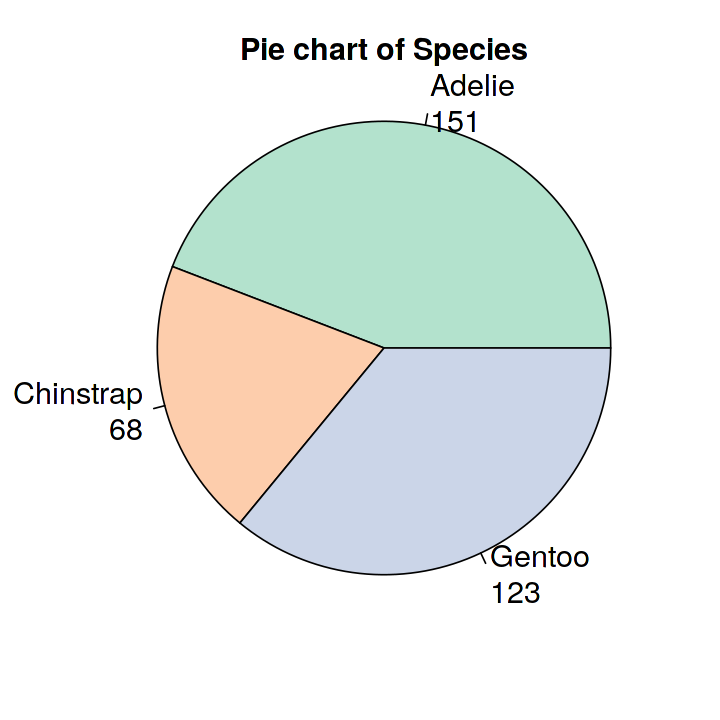

In [24]:
grps <- as.factor(data$Species)
colors <- c("#B3E2CD", "#FDCDAC", "#CBD5E8")
speciesTable <- table(data$Species)
options(repr.plot.width=6, repr.plot.height=6)
names <- c("Adelie", "Chinstrap", "Gentoo")
pieLabels <- paste(names, "\n", speciesTable, sep="")
pie(speciesTable, labels = pieLabels, main="Pie chart of Species", radius=2, col = brewer.pal(n = 3, name = "Pastel2"), cex=1.5, cex.main=1.5)

The pie plot above show us the distribution of the three penguin classes in the dataset. It is observable that the distribution is quite imbalanced since Adelie and Gentoo classes are much more frequent than Chinstrap, therefore we will have to take that into account for the future steps.

### Histogram of main features

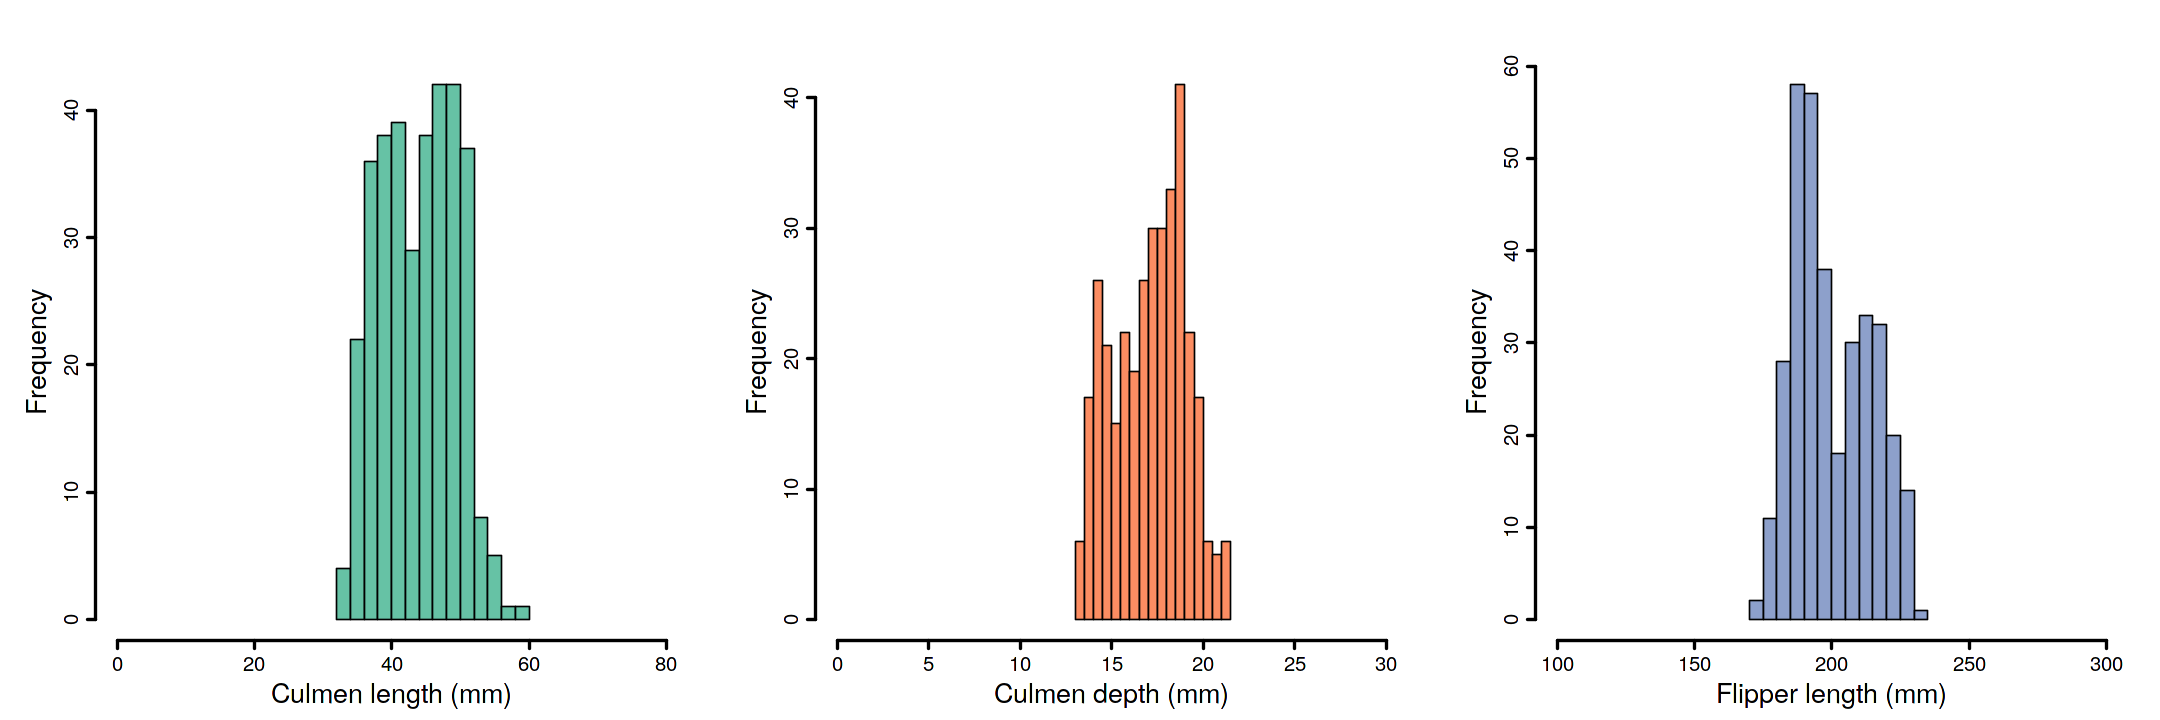

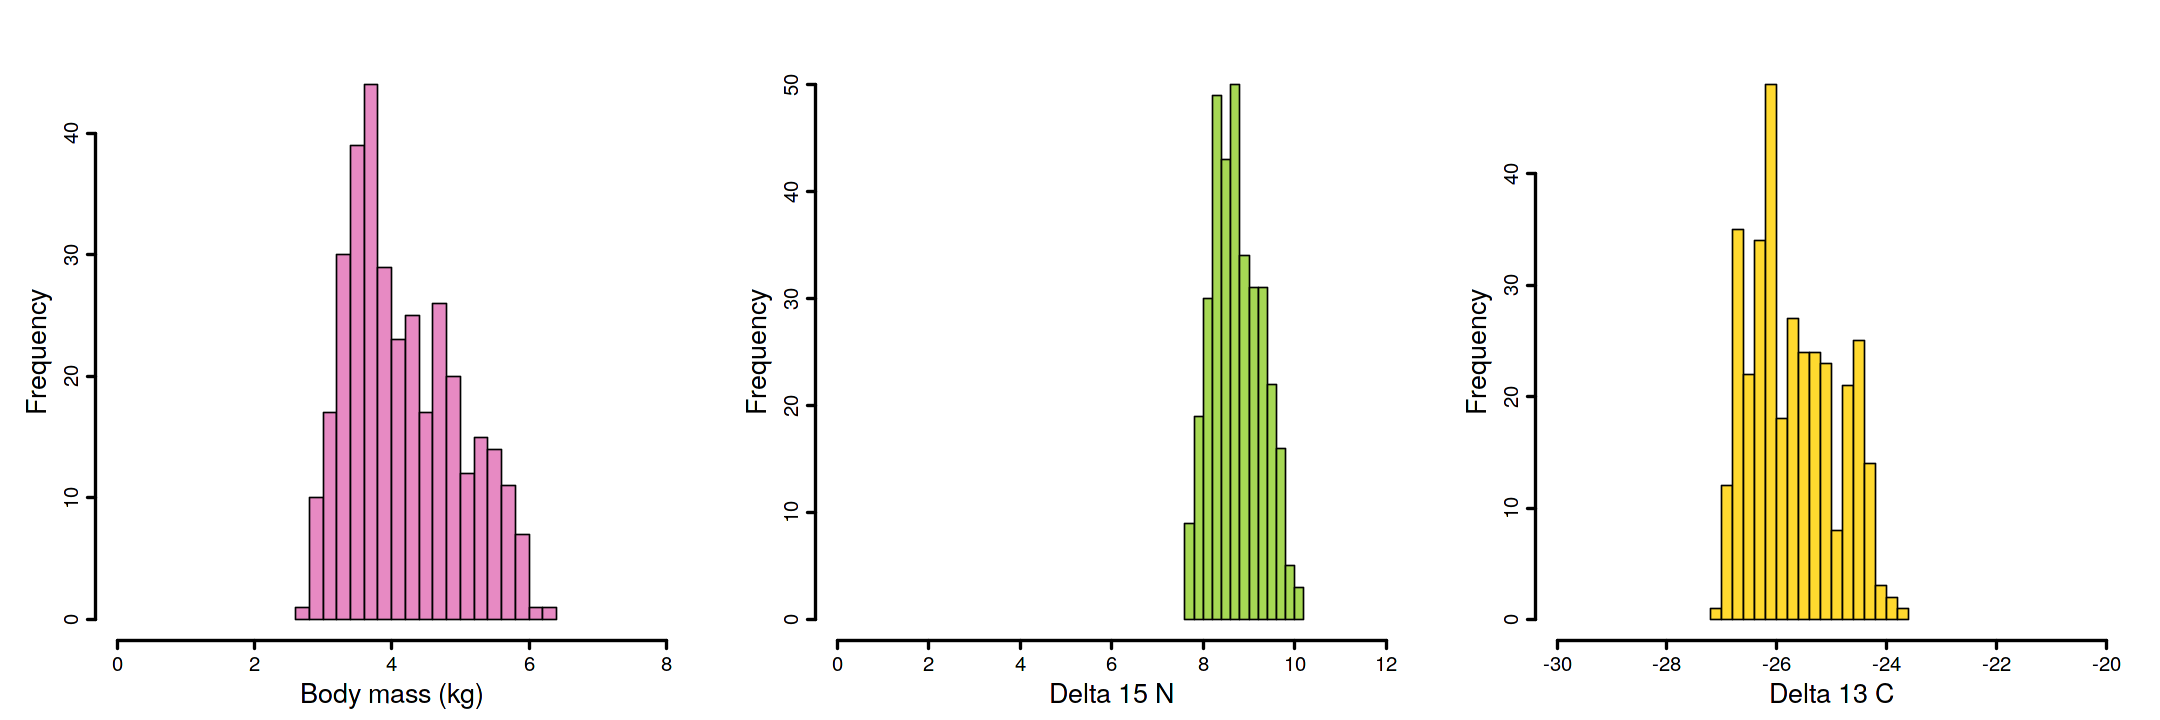

In [25]:
op <- par(mfrow=c(1,3), mar=c(5,6,4,2))
options(repr.plot.width=18, repr.plot.height=6)
hist(data$"Culmen Length [mm]", breaks=15 , xlim=c(0,80) , col="#66C2A5" , xlab="Culmen length (mm)" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)
hist(data$"Culmen Depth [mm]", breaks=15 , xlim=c(0,30) , col="#FC8D62" , xlab="Culmen depth (mm)" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)
hist(data$"Flipper Length [mm]", breaks=15 , xlim=c(100,300) , col="#8DA0CB" , xlab="Flipper length (mm)" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)
hist(data$"Body Mass [kg]", breaks=15 , xlim=c(0,8) , col="#E78AC3" , xlab="Body mass (kg)" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)
hist(data$"Delta 15 N", breaks=15 , xlim=c(0,12) , col="#A6D854" , xlab="Delta 15 N" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)
hist(data$"Delta 13 C", breaks=15 , xlim=c(-30,-20) , col="#FFD92F" , xlab="Delta 13 C" , ylab="Frequency" , main="", lwd=2, cex.lab=2, cex.axis=1.5)

From the previous pre-processing, we ended up with a dataset with six main features:
* Culmen length
* Culmen depth
* Flipper length
* Body mass
* Delta 15 N
* Delta 13 C

The histograms below show the distribution of each of these main features

### ECDF of main features

Down below we can find the visualization of ECDF for the main features. The Empirical Cumulative Distribution Function (ECDF) allows us to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set. 

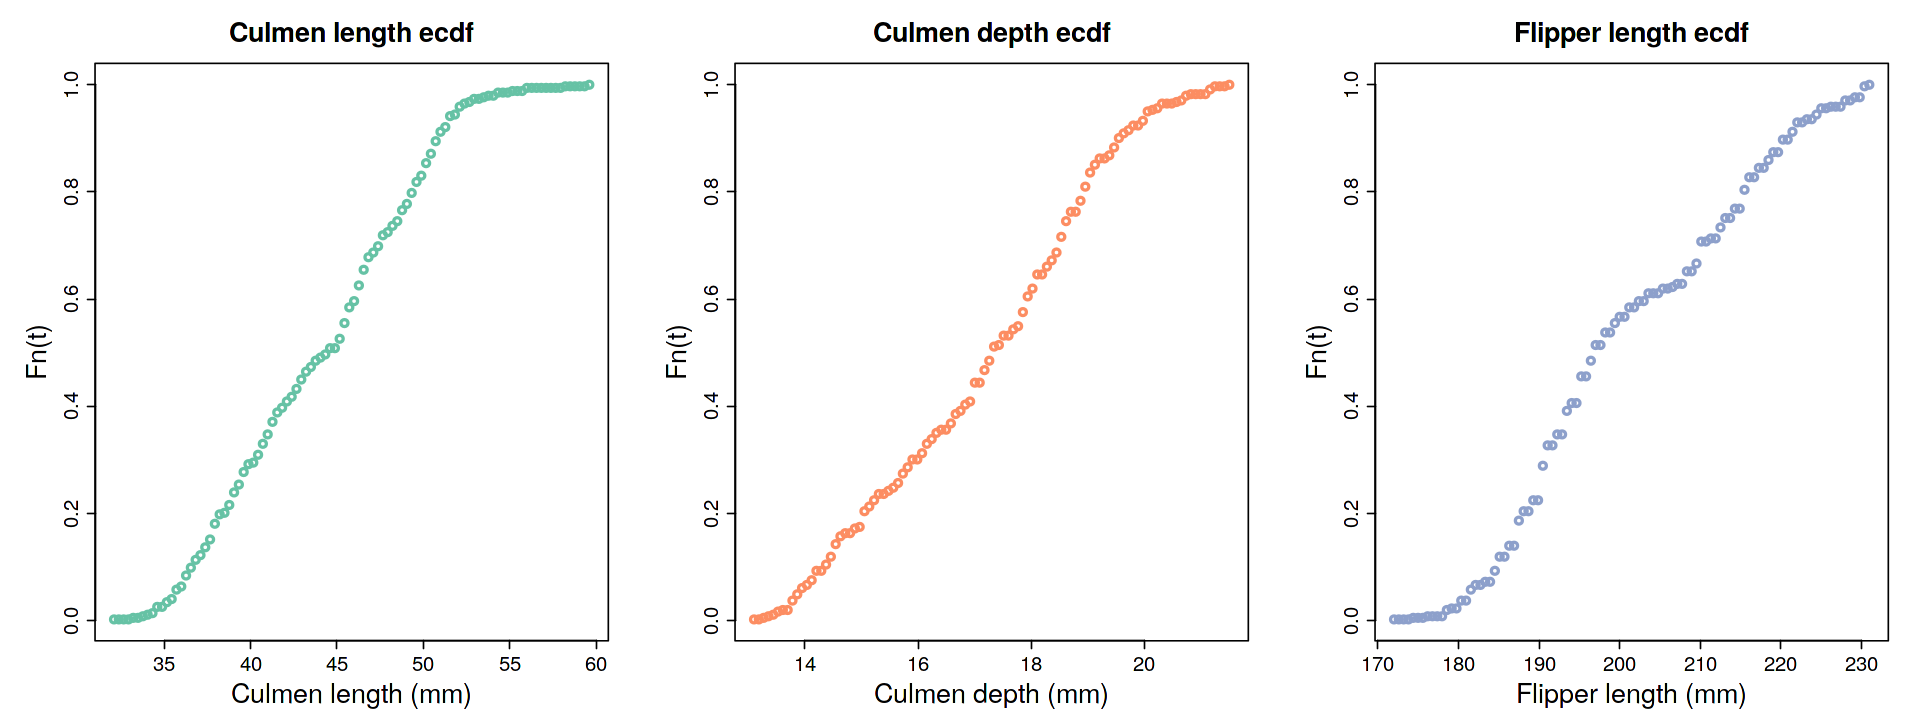

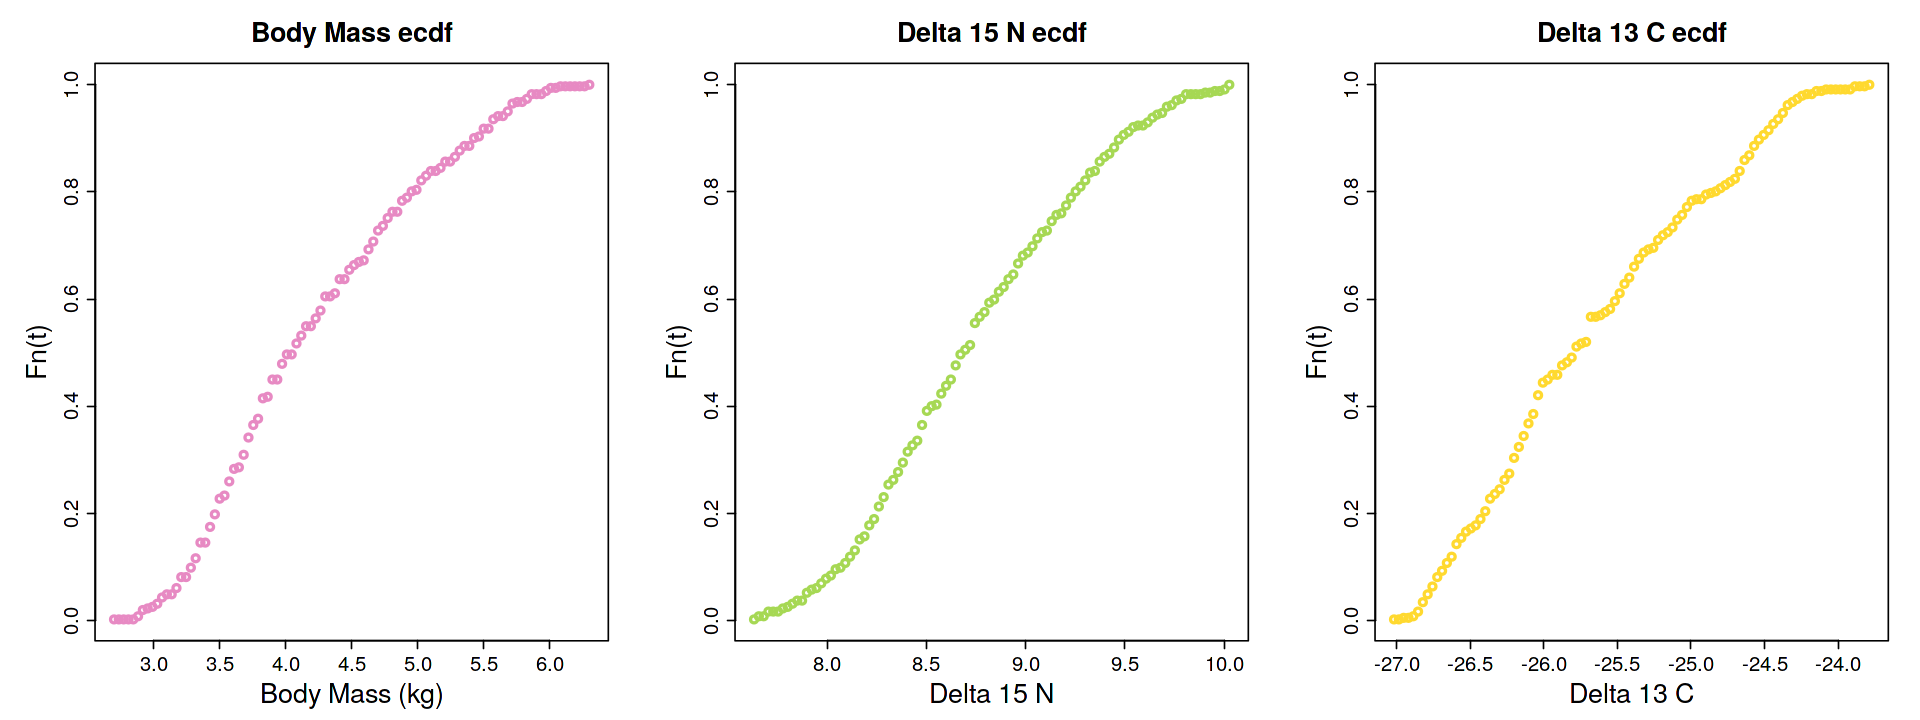

In [26]:
op <- par(mfrow=c(1,3), mar=c(5,6,4,2))
options(repr.plot.width=16, repr.plot.height=6)
Fn <- ecdf(data$"Culmen Length [mm]")
t <- seq(min(data$"Culmen Length [mm]"), max(data$"Culmen Length [mm]"), length.out=100)
plot(t,Fn(t), main="Culmen length ecdf", col="#66C2A5", xlab="Culmen length (mm)", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

Fn <- ecdf(data$"Culmen Depth [mm]")
t <- seq(min(data$"Culmen Depth [mm]"), max(data$"Culmen Depth [mm]"), length.out=100)
plot(t,Fn(t), main="Culmen depth ecdf", col="#FC8D62", xlab="Culmen depth (mm)", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

Fn <- ecdf(data$"Flipper Length [mm]") 
t <- seq(min(data$"Flipper Length [mm]"), max(data$"Flipper Length [mm]"), length.out=100)
plot(t,Fn(t), main="Flipper length ecdf", col="#8DA0CB", xlab="Flipper length (mm)", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

Fn <- ecdf(data$"Body Mass [kg]") 
t <- seq(min(data$"Body Mass [kg]"), max(data$"Body Mass [kg]"), length.out=100)
plot(t,Fn(t), main="Body Mass ecdf", col="#E78AC3", xlab="Body Mass (kg)", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

Fn <- ecdf(data$"Delta 15 N") 
t <- seq(min(data$"Delta 15 N"), max(data$"Delta 15 N"), length.out=100)
plot(t,Fn(t), main="Delta 15 N ecdf", col="#A6D854", xlab="Delta 15 N", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

Fn <- ecdf(data$"Delta 13 C") 
t <- seq(min(data$"Delta 13 C"), max(data$"Delta 13 C"), length.out=100)
plot(t,Fn(t), main="Delta 13 C ecdf", col="#FFD92F", xlab="Delta 13 C", lwd=2, cex.lab=2, cex.axis=1.5, cex.main=2)

### Scatter plot matrix

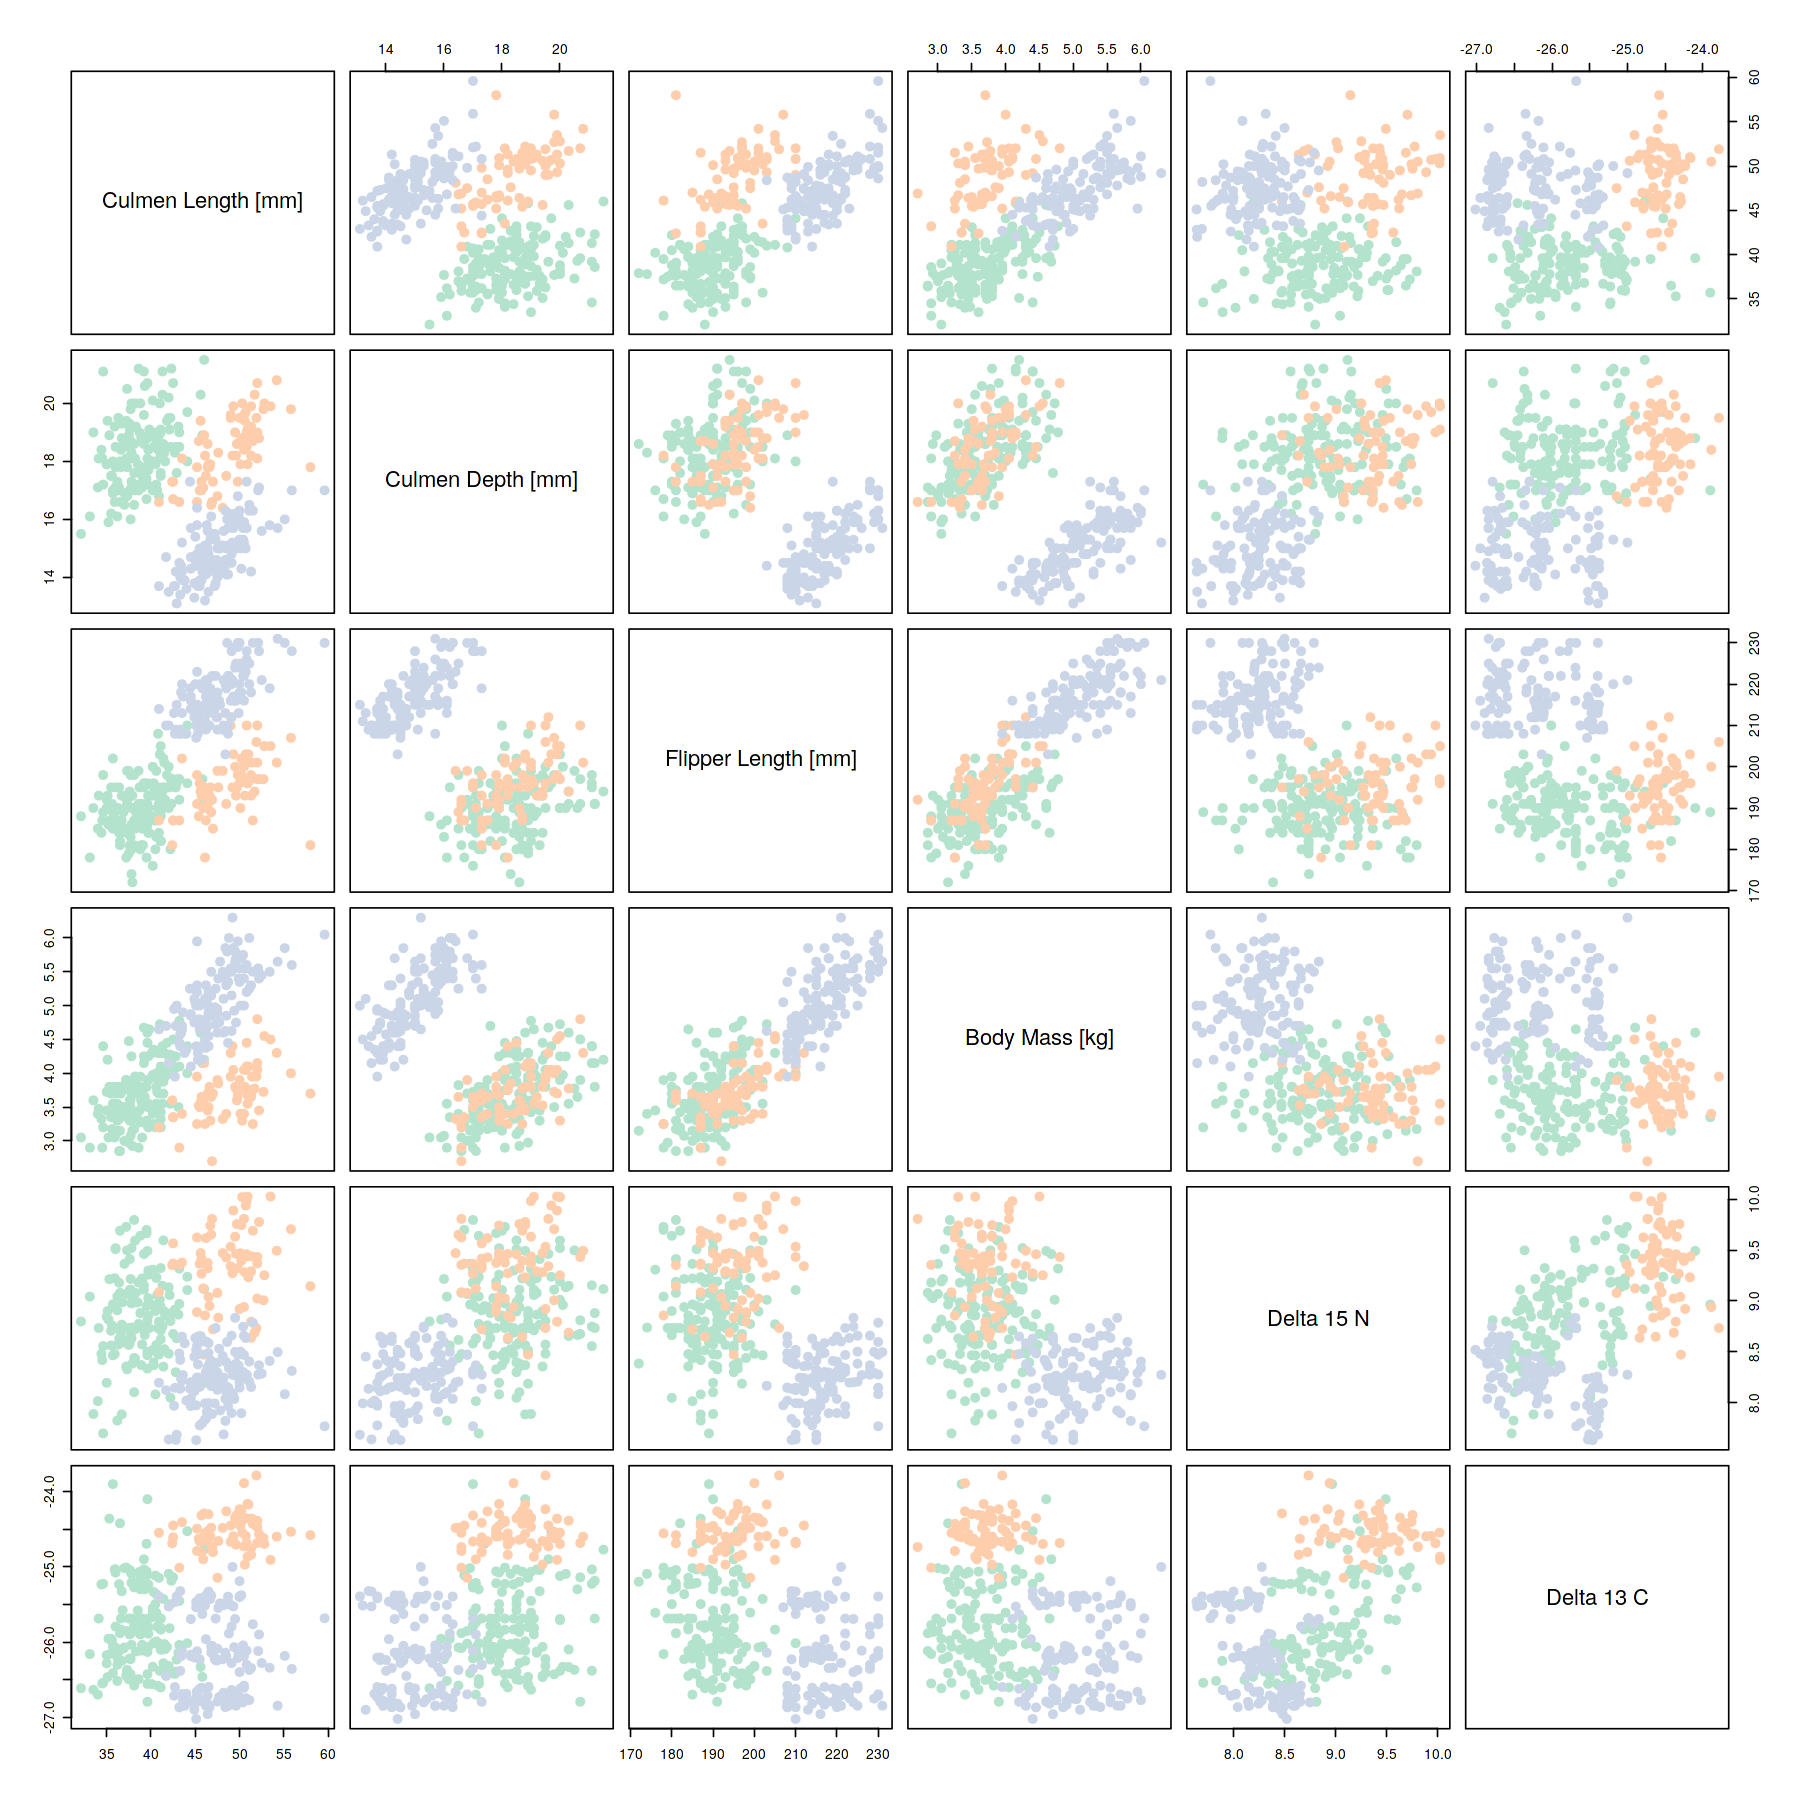

In [27]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(data[,3:8],cex=1.5,pch=16,col=colors[grps])

By analyzing the scatter matrix we observe that there are some combinations of scatter plots that already show three distinctive groups. Therefore in the next figures we show in detail some of these cases.

#### A zoom in on informative scatter plots

Below we show four picked informative scatter plots that give us more detail about the data distribution.

Warning message in par(fig = c(0, 0.8, 0, 0.8), new = TRUE):
“calling par(new=TRUE) with no plot”


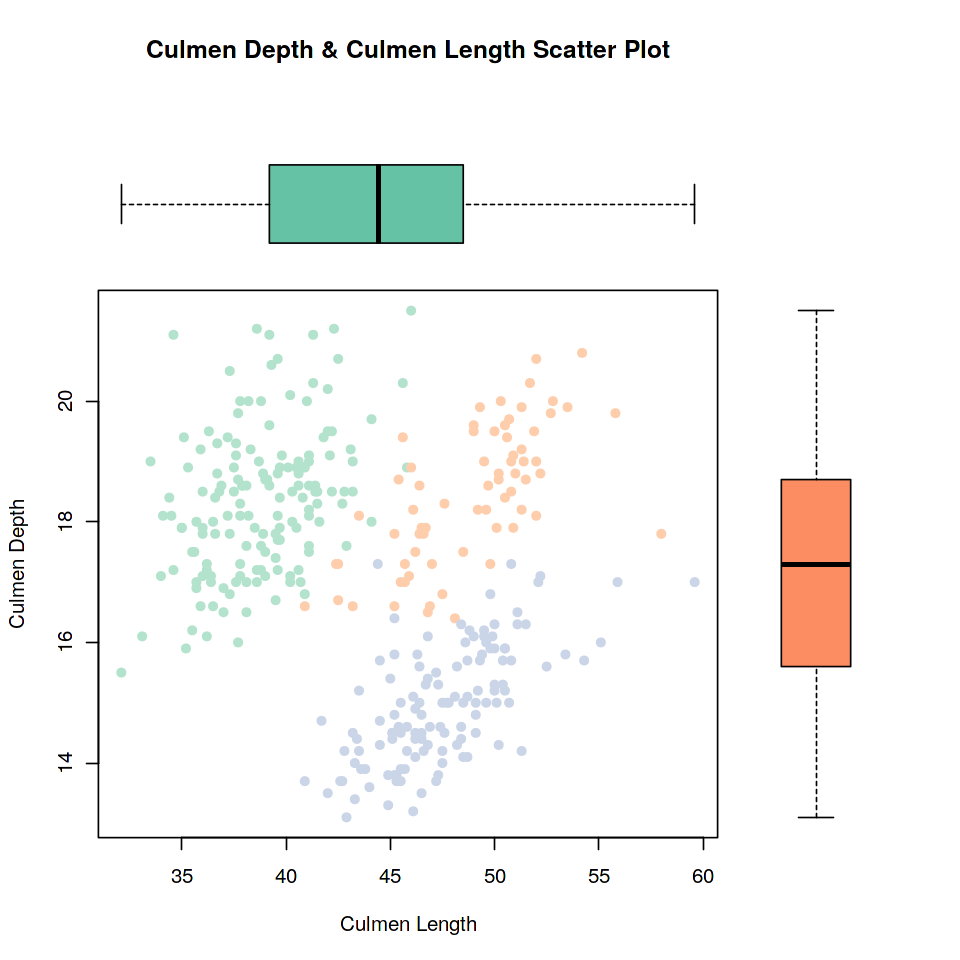

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(data$"Culmen Length [mm]", data$"Culmen Depth [mm]", xlab="Culmen Length",
  ylab="Culmen Depth", col=colors[grps], pch=16)
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(data$"Culmen Length [mm]", horizontal=TRUE, col="#66C2A5", axes=FALSE, main="Culmen Depth & Culmen Length Scatter Plot")
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(data$"Culmen Depth [mm]",col="#FC8D62", axes=FALSE)

Warning message in par(fig = c(0, 0.8, 0, 0.8), new = TRUE):
“calling par(new=TRUE) with no plot”


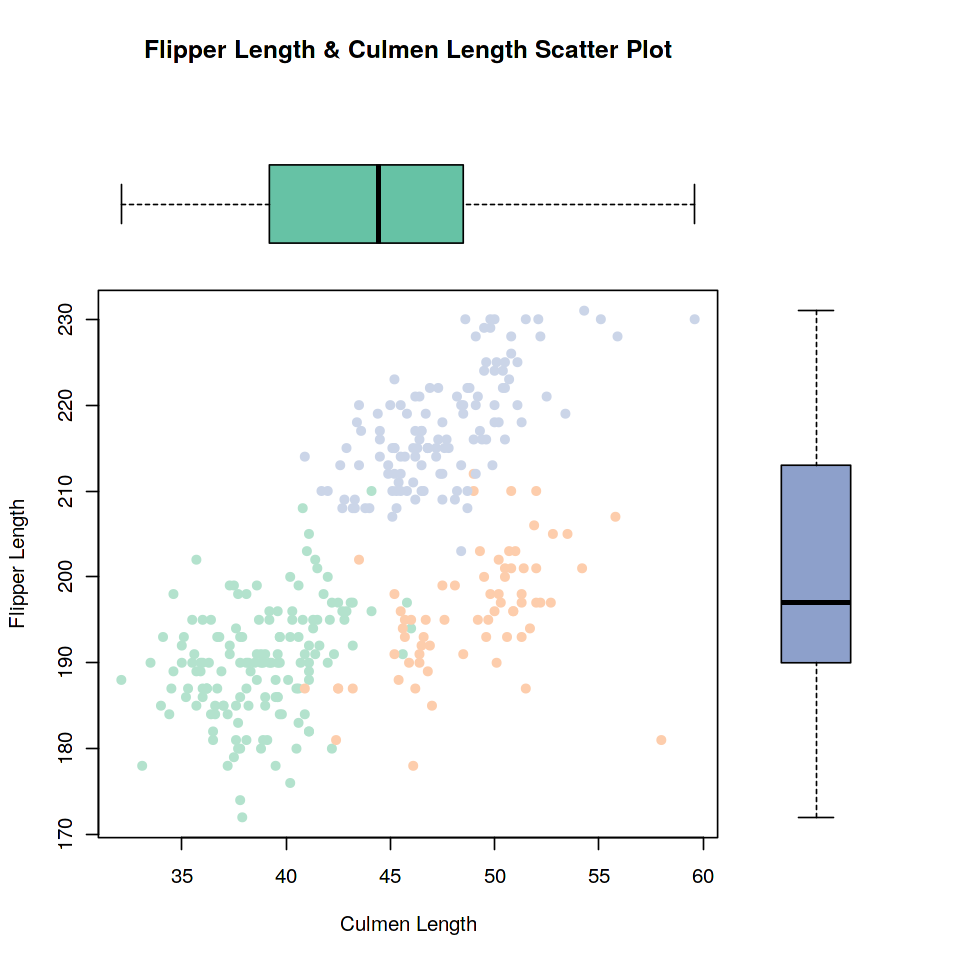

In [29]:
options(repr.plot.width=8, repr.plot.height=8)
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(data$"Culmen Length [mm]", data$"Flipper Length [mm]", xlab="Culmen Length",
  ylab="Flipper Length", col=colors[grps], pch=16)
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(data$"Culmen Length [mm]", col="#66C2A5", horizontal=TRUE, axes=FALSE, main="Flipper Length & Culmen Length Scatter Plot")
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(data$"Flipper Length [mm]",col="#8DA0CB", axes=FALSE)

Warning message in par(fig = c(0, 0.8, 0, 0.8), new = TRUE):
“calling par(new=TRUE) with no plot”


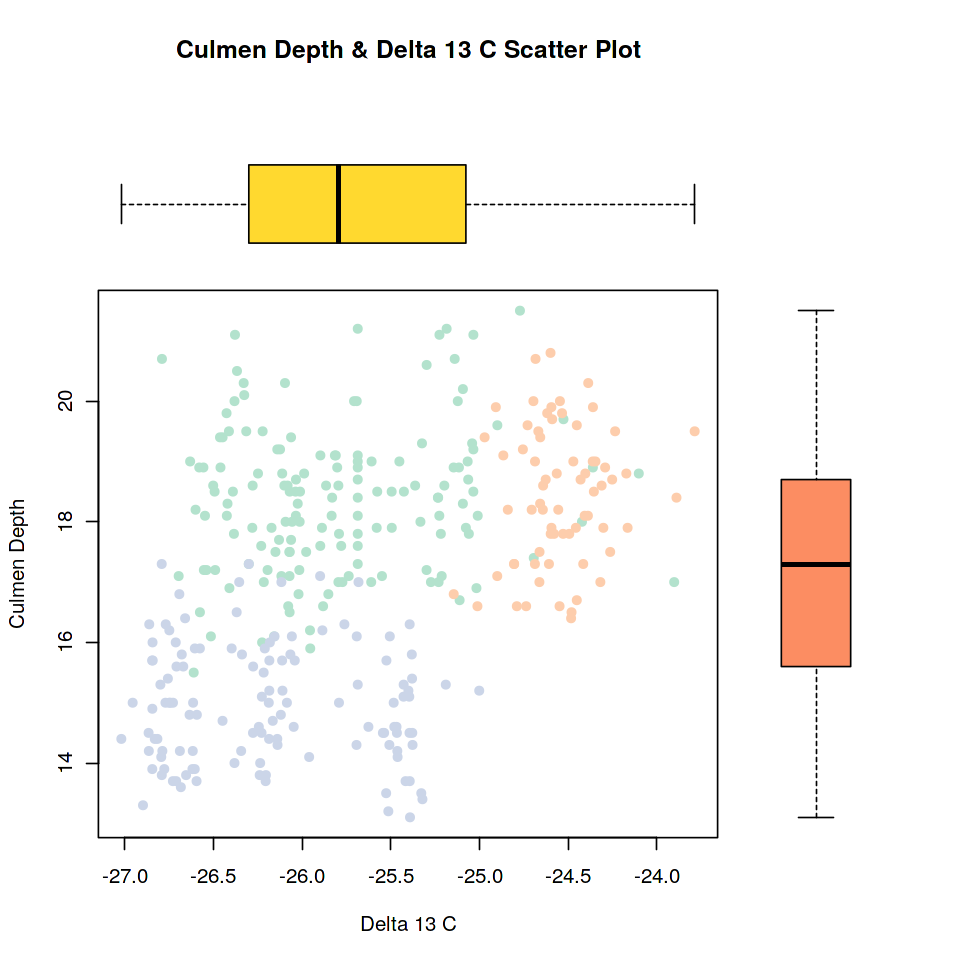

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(data$"Delta 13 C", data$"Culmen Depth [mm]", xlab="Delta 13 C",
  ylab="Culmen Depth", col=colors[grps], pch=16)
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(data$"Delta 13 C", horizontal=TRUE, col="#FFD92F",axes=FALSE, main="Culmen Depth & Delta 13 C Scatter Plot")
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(data$"Culmen Depth [mm]", col="#FC8D62", axes=FALSE)

Furthermore, we also realize that some combinations of more than two features also show a separation between classes

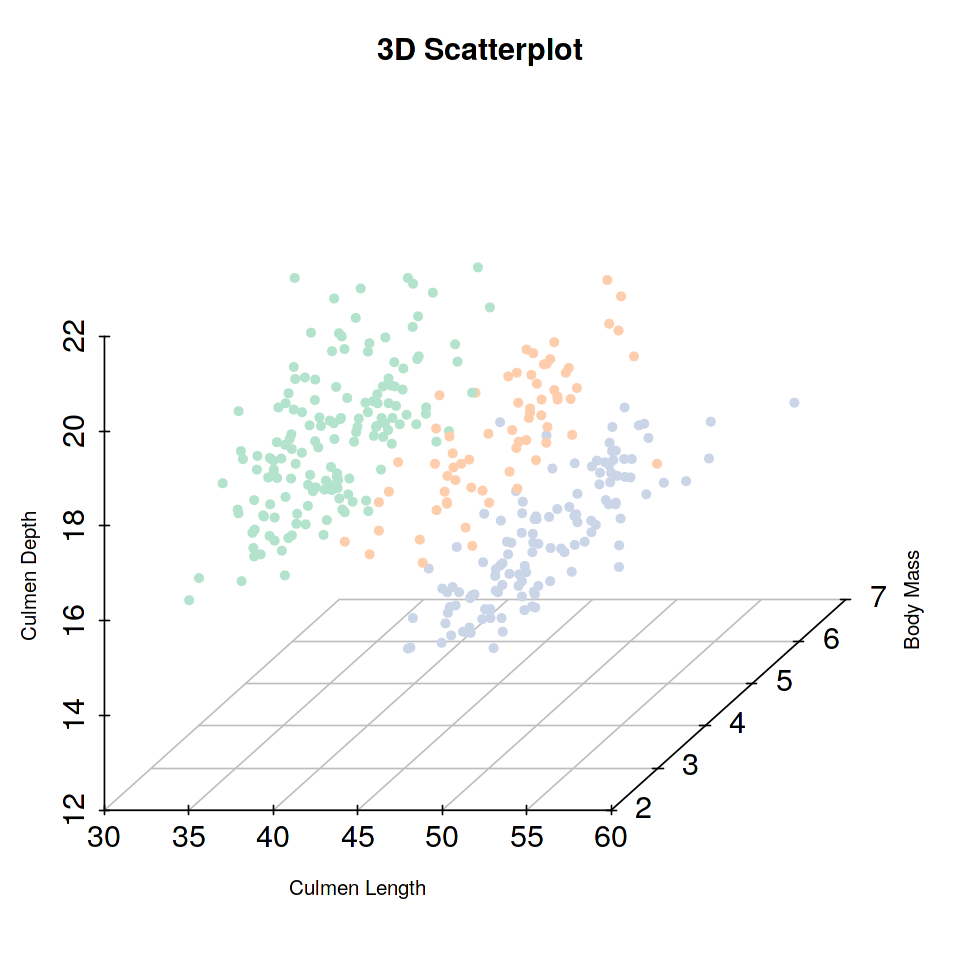

In [31]:
library(scatterplot3d)
options(repr.plot.width=8, repr.plot.height=8)
scatterplot3d(data$"Culmen Length [mm]",data$"Body Mass [kg]",data$"Culmen Depth [mm]",main="3D Scatterplot", pch = 16,color=colors[grps], grid = TRUE, box = FALSE, xlab = "Culmen Length", 
              ylab = "Body Mass", zlab = "Culmen Depth ", cex.lab=1, cex.axis=1.5, cex.main=1.5)

### Feature distribution for each class

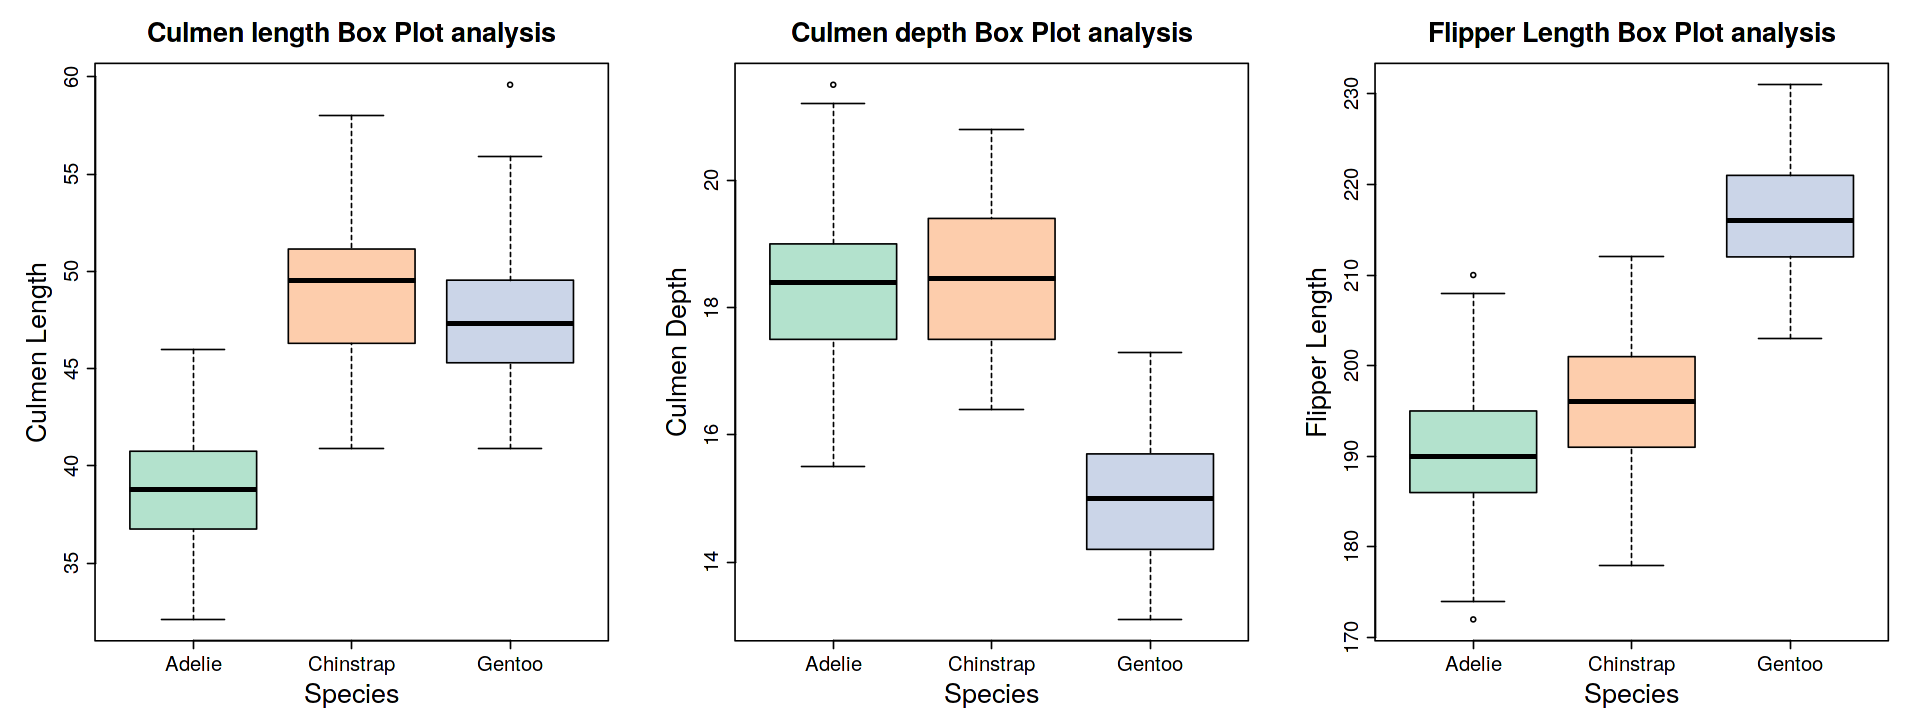

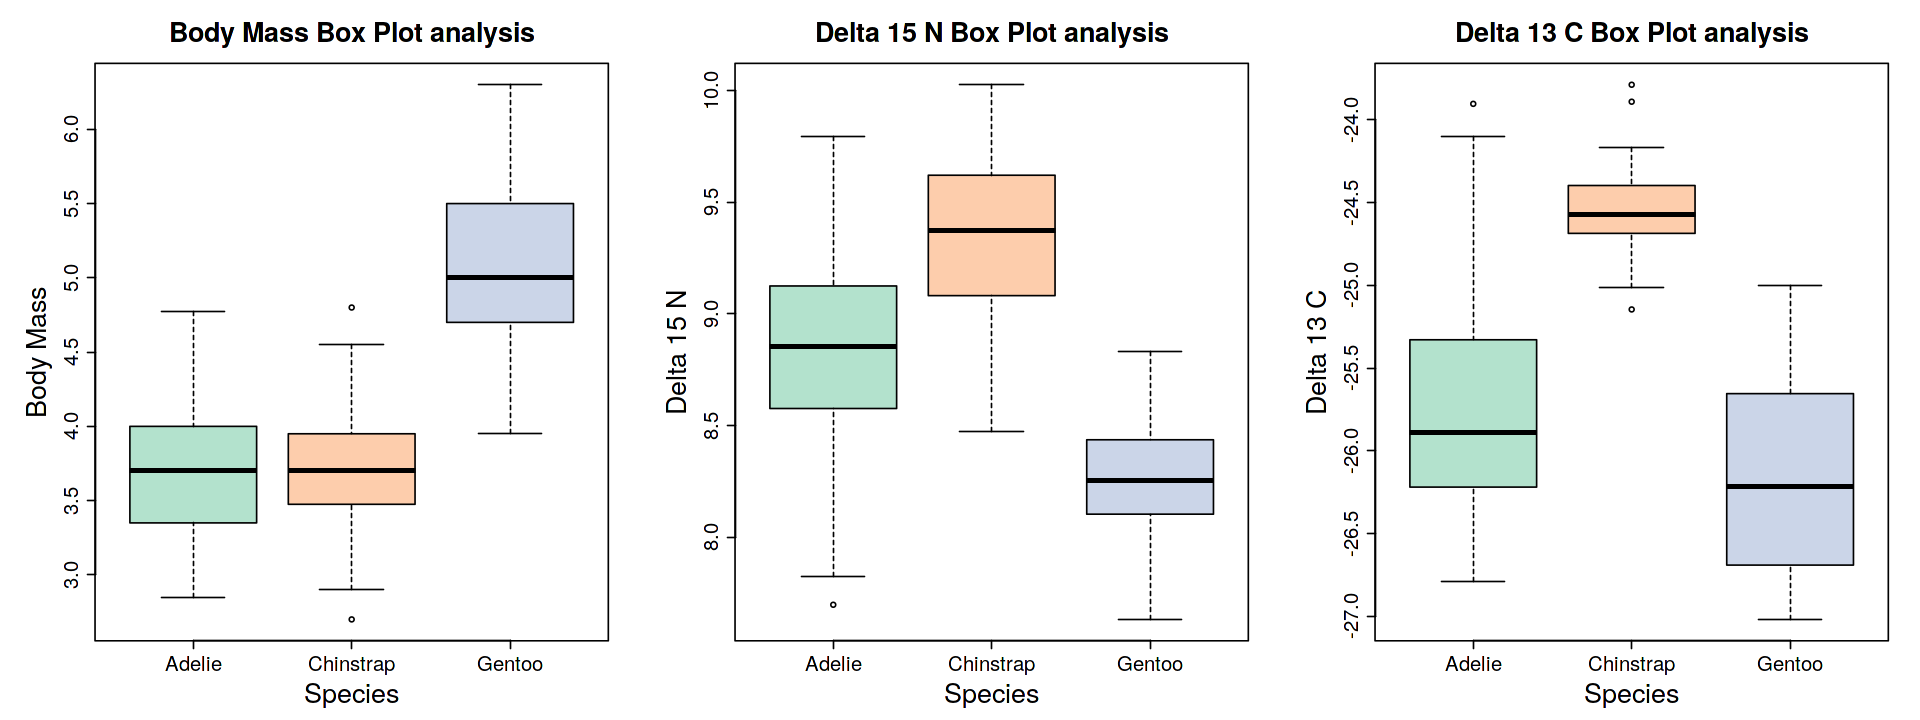

In [32]:
options(repr.plot.width=16, repr.plot.height=6)
op <- par(mfrow=c(1,3), mar=c(5,6,4,2))

boxplot(data$"Culmen Length [mm]" ~ Species, data=data,
     main="Culmen length Box Plot analysis",
     ylab="Culmen Length", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

boxplot(data$"Culmen Depth [mm]" ~ Species, data=data,
     main="Culmen depth Box Plot analysis",
     ylab="Culmen Depth", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

boxplot(data$"Flipper Length [mm]" ~ Species, data=data,
     main="Flipper Length Box Plot analysis",
     ylab="Flipper Length", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

boxplot(data$"Body Mass [kg]" ~ Species, data=data,
     main="Body Mass Box Plot analysis",
     ylab="Body Mass", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

boxplot(data$"Delta 15 N" ~ Species, data=data,
     main="Delta 15 N Box Plot analysis",
     ylab="Delta 15 N", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

boxplot(data$"Delta 13 C" ~ Species, data=data,
     main="Delta 13 C Box Plot analysis",
     ylab="Delta 13 C", cex.lab=2, cex.axis=1.5, cex.main=2, col = brewer.pal(n = 3, name = "Pastel2"))

In the upper figure we can observe a box plot analysis of each interesting feature for every specie. The box plot show the highest and lowest value, the median and the 25% and 75% percentils for feature for each class.

It is highly remarkable that in many of these plots we may observer some outliers, however they are just spared cases, so these data points will not affect harshly our model.

### Correlation matrix

In the plot below we may see a different approach to show the correlation matrix in a intuitive way.

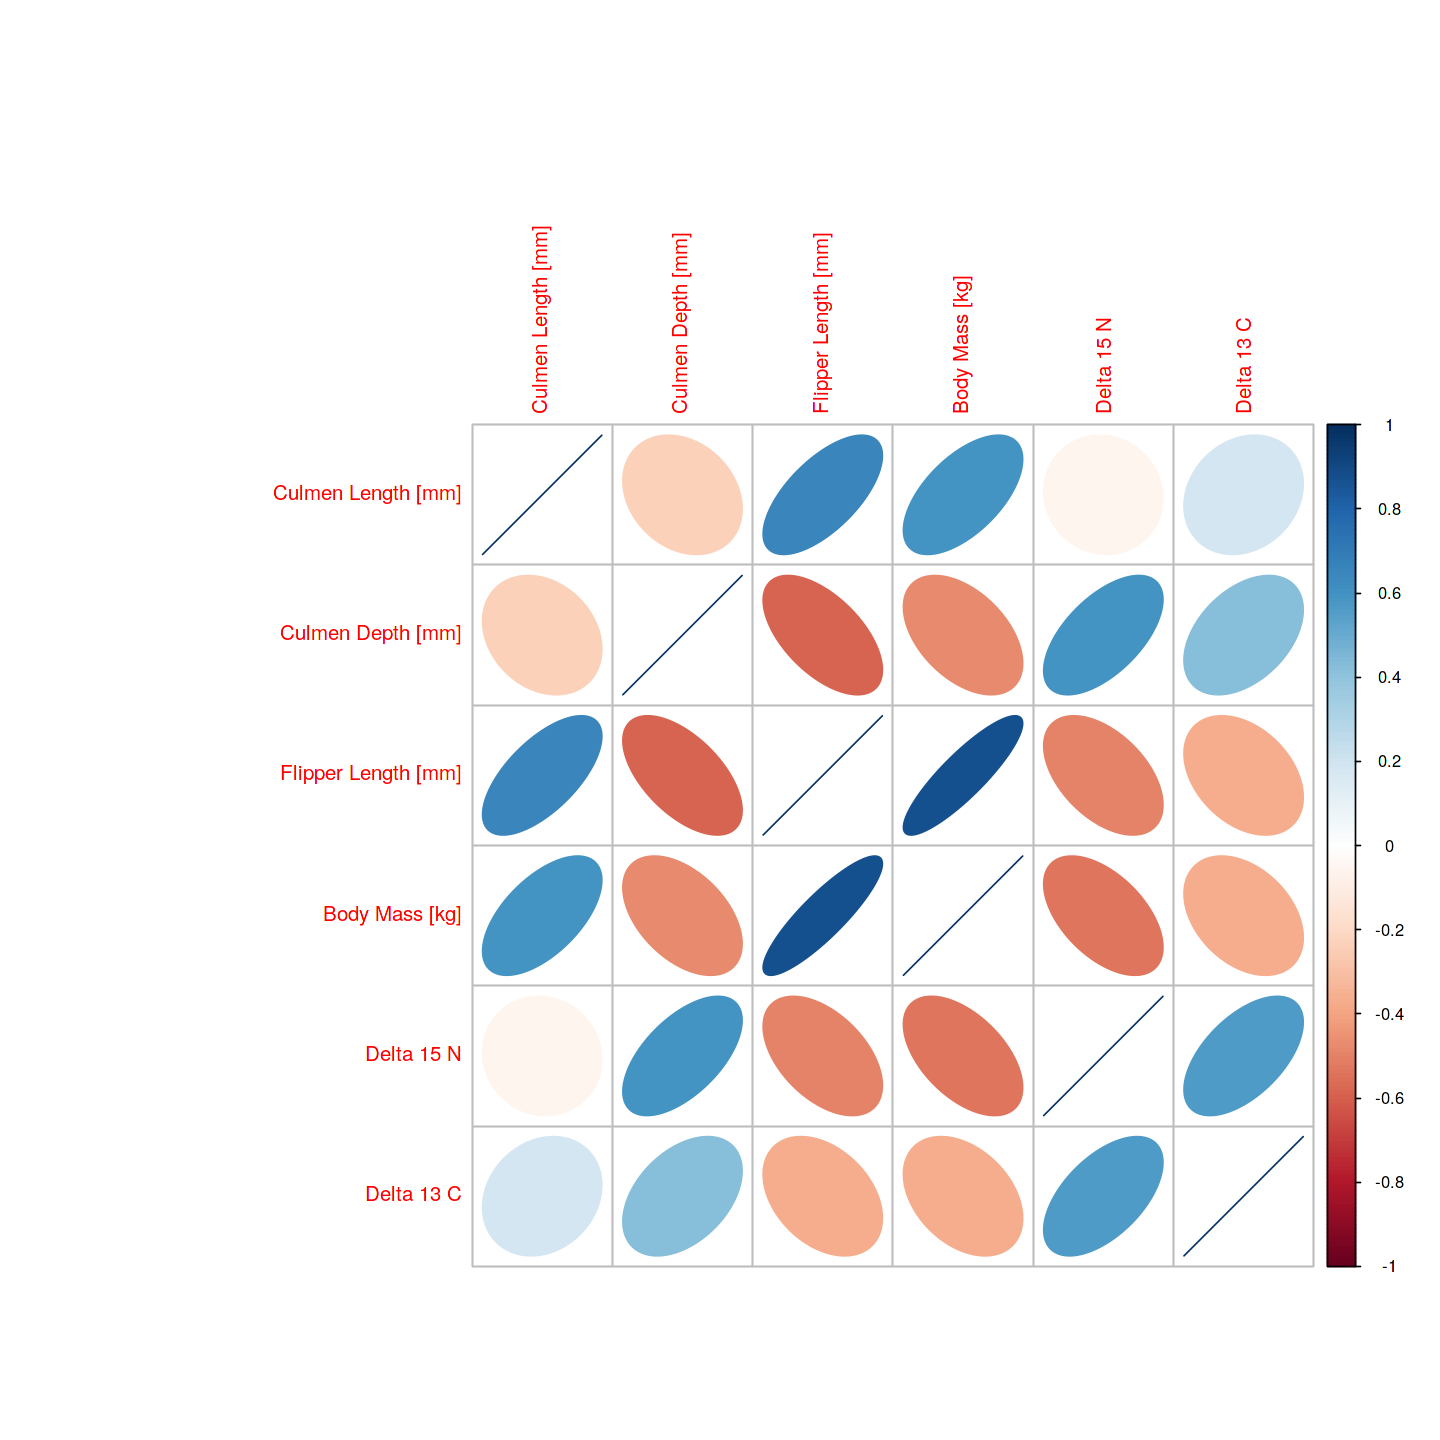

In [33]:
#correlation matrix
options(repr.plot.width=12, repr.plot.height=12)
data_matrix <- as.matrix(data[,3:8])
cm <- cor(data_matrix)
corrplot(cm, method="ellipse")

### Parallel coordinates analysis

We are going to finish the data visualization analysis by observing the parallel coordinates plot of our dataset.

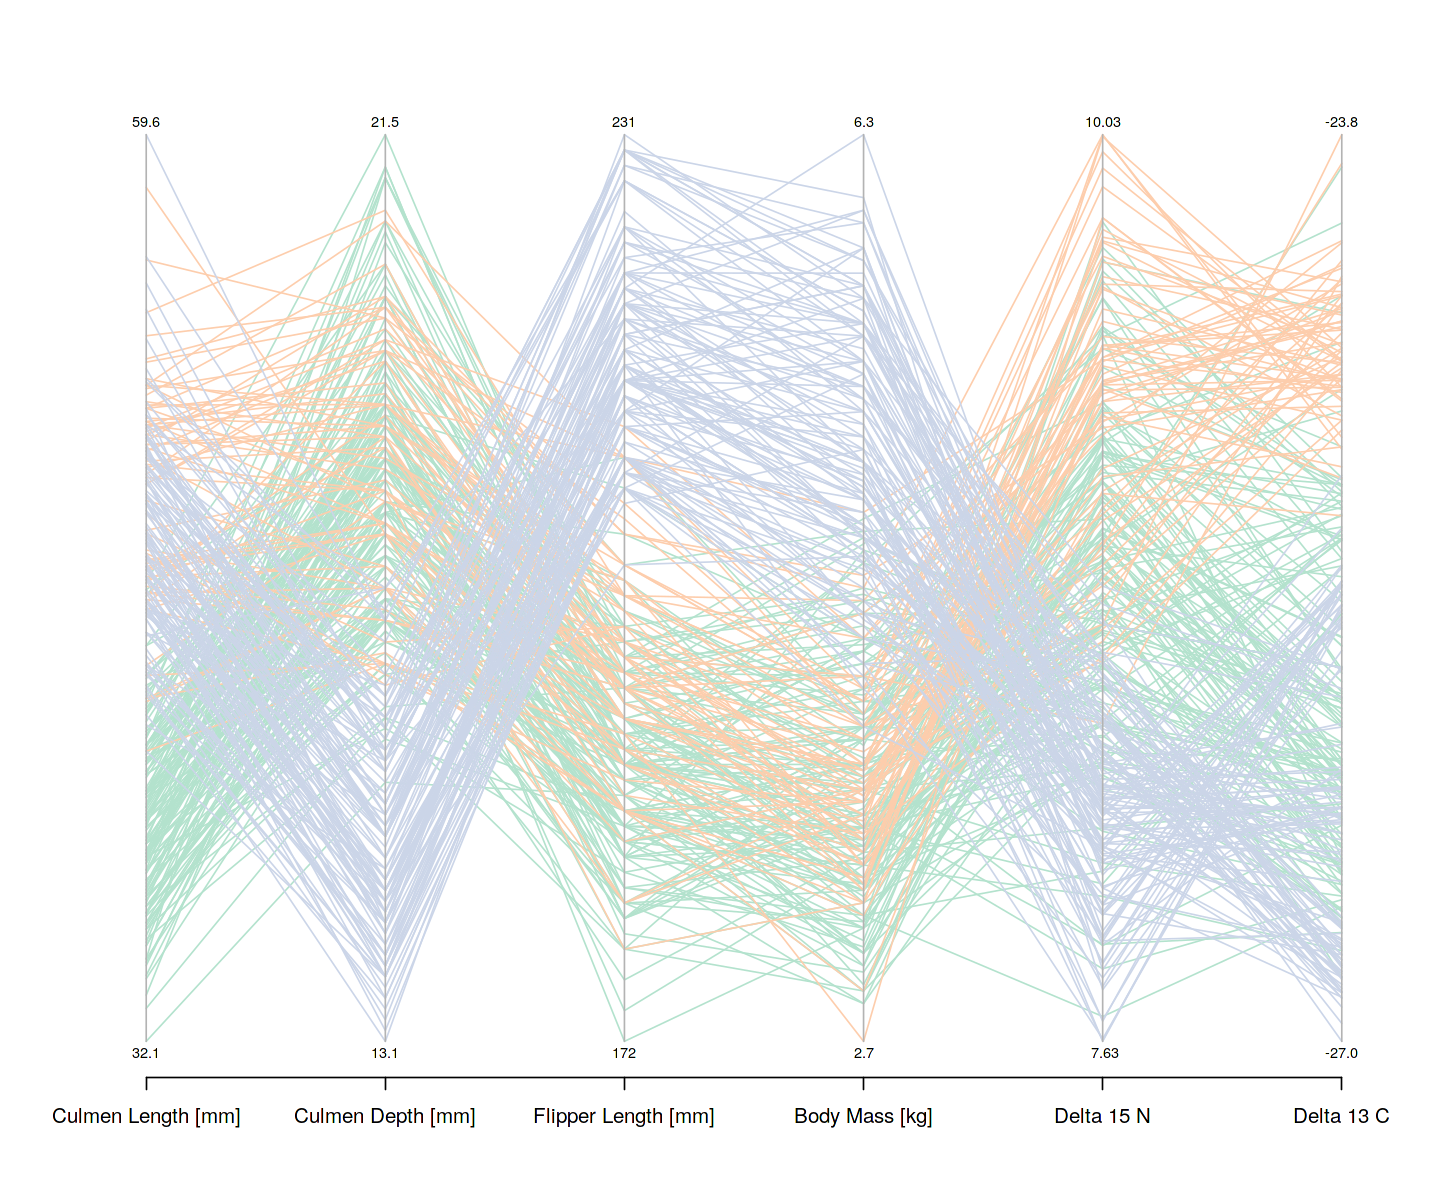

In [34]:
options(repr.plot.width=12, repr.plot.height=10)
parcoord(data[,3:8], col=colors[grps], var.label = TRUE)


## Data Encoding

We have two categorical columns: *Species* and *Island*. Since *Species* is our target variable (what we will try to predict), we will not change it for now. In order to be able to apply some modelling algorithms, we have to encode the categorical features in numerical columns. We could just replace each category by a number. But that would introduce a order between the categories, and we do not want that when dealing with nominal data. Therefore, we apply One-Hot Encoding. This technique will create c-1 columns for a categorical variable with c categories. Each column will be either one or zero in case the sample belongs or not to that category. All the columns zero represent the category for which a column was not created.

In [35]:
dmy <- dummyVars(" ~. ", data = data[, !(colnames(data) %in% c("Species"))], fullRank = T)
encoded_data <- data.frame(predict(dmy, newdata = data[, !(colnames(data) %in% c("Species"))]))

# merge encoded dataset and drop the categorical features
data <- merge(data, encoded_data[grep("Island", colnames(encoded_data))], by.x=0, by.y=0)
data = data[, !(colnames(data) %in% c("Island", "Row.names"))]

We check the result of the encoding and verify that the column *Island* was replaced by two encoded columns.

In [36]:
head(data)

Species Culmen Length [mm] Culmen Depth [mm] Flipper Length [mm]
1 Adelie  39.1               18.7              181                
2 Adelie  42.0               20.2              190                
3 Adelie  43.2               18.5              192                
4 Adelie  35.0               17.9              192                
5 Adelie  41.0               20.0              203                
6 Adelie  37.7               16.0              183                
  Body Mass [kg] Delta 15 N Delta 13 C Island.Dream Island.Torgersen
1 3.750          8.733382   -25.68629  0            1               
2 4.250          9.133620   -25.09368  0            1               
3 4.100          8.970250   -26.03679  1            0               
4 3.725          8.844510   -26.28055  0            0               
5 4.725          9.010790   -26.38085  0            0               
6 3.075          9.215100   -26.22530  0            0

## Data Normalization

The variables in our dataset are measured in different units and therefore have different scales. We would like to have them in a similar scale so that we can compare them in the modelling without giving more importance to the features that have a bigger magnitude. To achieve that, we standardize the numeric columns to have mean zero and variance one.

In [37]:
numeric_data <- data[, c("Culmen Length [mm]", "Culmen Depth [mm]", "Flipper Length [mm]", "Body Mass [kg]", "Delta 15 N", "Delta 13 C")]

standard_transformer <- preProcess(numeric_data, method=c("center", "scale"))
data <- predict(standard_transformer, data)

We observe the result in the first rows of the dataset.

In [38]:
head(data)

Species Culmen Length [mm] Culmen Depth [mm] Flipper Length [mm]
1 Adelie  -0.8832047          0.7843001        -1.4162715         
2 Adelie  -0.3520286          1.5438733        -0.7762357         
3 Adelie  -0.1322317          0.6830236        -0.6340056         
4 Adelie  -1.6341777          0.3791944        -0.6340056         
5 Adelie  -0.5351928          1.4425969         0.1482604         
6 Adelie  -1.1396345         -0.5829317        -1.2740413         
  Body Mass [kg] Delta 15 N Delta 13 C Island.Dream Island.Torgersen
1 -0.56331670    0.0000000   0.0000000 0            1               
2  0.06016004    0.7384814   0.7587366 0            1               
3 -0.12688299    0.4370467  -0.4487527 1            0               
4 -0.59449054    0.2050433  -0.7608452 0            0               
5  0.65246294    0.5118472  -0.8892620 0            0               
6 -1.40501030    0.8888205  -0.6901071 0            0

Lastly, we plot the final summary of our data after the preprocessing.

In [39]:
summary(data)

      Species    Culmen Length [mm] Culmen Depth [mm]  Flipper Length [mm]
 Adelie   :151   Min.   :-2.16535   Min.   :-2.05144   Min.   :-2.0563    
 Chinstrap: 68   1st Qu.:-0.86031   1st Qu.:-0.78548   1st Qu.:-0.7762    
 Gentoo   :123   Median : 0.09672   Median : 0.07537   Median :-0.2784    
                 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000    
                 3rd Qu.: 0.83854   3rd Qu.: 0.78430   3rd Qu.: 0.8594    
                 Max.   : 2.87166   Max.   : 2.20217   Max.   : 2.1395    
 Body Mass [kg]      Delta 15 N         Delta 13 C       Island.Dream   
 Min.   :-1.8726   Min.   :-2.03179   Min.   :-1.7057   Min.   :0.0000  
 1st Qu.:-0.8127   1st Qu.:-0.78874   1st Qu.:-0.7797   1st Qu.:0.0000  
 Median :-0.1892   Median :-0.09589   Median :-0.1397   Median :0.0000  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   :0.3626  
 3rd Qu.: 0.6836   3rd Qu.: 0.75260   3rd Qu.: 0.7749   3rd Qu.:1.0000  
 Max.   : 2.6164   Max.   : 2.38398  

## Data Formatting

Lastly, we change the names of the columns to valid columns names (without spaces and special characteres). This will avoid problems with training methods in the next section.

In [40]:
colnames(data) <- make.names(colnames(data))
head(data)

Species Culmen.Length..mm. Culmen.Depth..mm. Flipper.Length..mm.
1 Adelie  -0.8832047          0.7843001        -1.4162715         
2 Adelie  -0.3520286          1.5438733        -0.7762357         
3 Adelie  -0.1322317          0.6830236        -0.6340056         
4 Adelie  -1.6341777          0.3791944        -0.6340056         
5 Adelie  -0.5351928          1.4425969         0.1482604         
6 Adelie  -1.1396345         -0.5829317        -1.2740413         
  Body.Mass..kg. Delta.15.N Delta.13.C Island.Dream Island.Torgersen
1 -0.56331670    0.0000000   0.0000000 0            1               
2  0.06016004    0.7384814   0.7587366 0            1               
3 -0.12688299    0.4370467  -0.4487527 1            0               
4 -0.59449054    0.2050433  -0.7608452 0            0               
5  0.65246294    0.5118472  -0.8892620 0            0               
6 -1.40501030    0.8888205  -0.6901071 0            0

# Advanced Data Analysis
---
In the previous steps we focused our work on **describing and understanding** the data, **selecting the key features** for our analysis, **cleaning** the data, **exploring and visualizing** the data for a deeper understanding and lastly, **encoding and normalizing** the data as preparation for this advance analysis.

In next sections we test and compare different **machine learning classification techniques** in order to choose one to produce a classifier model able to predict to which specie a penguin belongs based on its characteristics.

## Preparing the Data
---
In this section we prepare the data to make it ready to be used in the following sections with different ML models. 

### Splitting the Data
---
We split the data in **Training and Test sets**. We use different data for training and testing the models to avoid overfitting. If we train and test a model on the same data, the algorithm can somehow "memorize" the relationships in that set of data and it will not generalize to unseen data. We use a split of 75% for training and 25% for testing.

In [41]:
set.seed(42) # we set the random seed so that the experiment is reproducible

index <- createDataPartition(data$Species, p = 0.75, list = FALSE)
train_data <- data[index, ]
test_data  <- data[-index, ]

sprintf("The trainining set contains %d rows", nrow(train_data))
sprintf("The test set contains %d rows", nrow(test_data))

[1] "The trainining set contains 258 rows"

[1] "The test set contains 84 rows"

Likewise, the data used for validation, that is, assessing and comparing models, should not be the same one used for training and testing. Because we have few samples, instead of creating a validation set, we use **k-fold cross validation**. With this configuration, the training data is split in k subsets and the model is trained k times in k-1 of the subsets and tested on the remaining one. Finally, the performance is an average of the performance of all k runs. Additionally, we can run k-fold cross validation many times and average the performance to consider many different splits of the data. 

To define the validation procedure, we create a `trainControl` object, which is a passed as a configuration of the `train` function. We choose to use **10-fold cross validation with 10 repetitions** as these are the most commonly used numbers.

In [42]:
fit_control <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10,
                           classProbs=TRUE)

### Balancing the Dataset
---
As we observed in the "Data Visualization" module, the dataset distribution is imbalanced since the Adelie class is dominant with 151 samples over the Gentoo and Chinstrap classes with 123 and 68 samples respectively. Because we have few samples, we balance the training set using random upsampling. The `upSample` function randomly sample (with replacement) the minority class to be the same size as the majority class. Notice that we do not balance the test set, since it should be a representation of the real world data. Although repeating samples of minority classes reinforce the learning of this classes during training, it does nothing during testing.

In [43]:
table(train_data$Species)

train_balanced <- upSample(x = train_data, y = train_data$Species)
train_balanced = train_balanced[, !(colnames(train_balanced) %in% c("Class"))]

table(train_balanced$Species)


   Adelie Chinstrap    Gentoo 
      114        51        93 


   Adelie Chinstrap    Gentoo 
      114       114       114 

## ML Technique Selection
---
For the incoming sections we will proceed to train, validate and compare different classifier models for our data. In order to select which models we are going to test first, we take into account three main factors:

1. We are dealing with a **classification** task with a **labeled** dataset
2. The size of the dataset (340 samples)
3. The previous data analysis and the number of resulting features

Based on that information we directly **discard Neural Network and Linear Classifier models** for the following reasons:
* The size of the dataset is too small to be able to use Neural Networks efficiently
* Through the previous analysis we observe the data does not seem to be linearly separable in the feature space. A linear model is too simple to model the behavior of the data.

Therefore, the we will evaluate the following algorithms:
* **K-Nearest Neighbours** classifier
* **Decision tree/pruning** classifier
* **Random-Forest** classifier
* **Support Vector Machine** classifier

### Technique Selection Design
---
For each of the considered models, we will perform the folling steps:

1. Train the model with the train dataset
1. Validate it with repeated 10-fold cross validation
1. Tune hyperparameters
1. Test the model with the test dataset
1. Compute the confusion matrix

We will measure the performance of the classifiers by their **Accuracy** and **Kappa**. These are the default metrics of the function `train`. Kappa or Cohen’s Kappa is like classification accuracy, except that it is normalized at the baseline of random chance on your dataset.

Notice that the `train` function from the `caret` package automatically performs hyperparameter tunning using grid search. The parameter `tuneLength` defines the number of values to be evaluated, and the parameter `tuneGrid` can be used to provide the specific grid of parameters to be tried. Therefore, we do not need to set and tune the parameters manually. Notice that only a limited number of parameters is available per model (usually only one parameter). These parameters are judged by the developers as the most relevant to tune the models.

### K-Nearest Neighbours
---

Fistly, we train the K-Nearest Neighbours classifier. This method is very intuitive, it defines the class of a sample by a majority voting of its k-Nearest Neighbours. In this implementation, the only parameter to be set is `k`, the number of neighbors, since the distance metric is euclidean and the kernel is linear. The euclidean metric is mainly used with continuous features while the Hamming distance with categorical features. Since we have only two categorical features (the encoding of `Island`), it seems suitable to use the euclidean distance. As for the kernel, given the results, the linear kernel seems to perform well, but higher dimensional kernels could be evaluated.

In [44]:
knn <- train(Species ~ .,
                data = train_balanced, 
                method = "knn", 
                trControl = fit_control,
                metric = "Accuracy")
knn

k-Nearest Neighbors 

342 samples
  8 predictor
  3 classes: 'Adelie', 'Chinstrap', 'Gentoo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 306, 308, 308, 308, 308, 309, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9967958  0.9951916
  7  0.9962244  0.9943348
  9  0.9926934  0.9890362

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

The algorithm has been trained with `k=5`, `k=7` and `k=9`. The highest accuracy achieved on the validation set was 99.79% with `k=5`.  Notice that `k` should be an odd number such that the voting is never a tie.

Therefore, we test the algorithm on the test data and compute the confusion matrix.

In [45]:
knn_preds <- predict(knn, newdata = test_data)
confusionMatrix(data = knn_preds, test_data$Species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        36         0      0
  Chinstrap      1        17      0
  Gentoo         0         0     30

Overall Statistics
                                          
               Accuracy : 0.9881          
                 95% CI : (0.9354, 0.9997)
    No Information Rate : 0.4405          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9814          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.9730           1.0000        1.0000
Specificity                 1.0000           0.9851        1.0000
Pos Pred Value              1.0000           0.9444        1.0000
Neg Pred Value              0.9792           1.0000        1.0000
Prevalence                  0.4405        

The algorithm has done one misclassification of the Adelie class resulting in 98.81% accuracy. We observe that depending on the train-test split (different runs), the `k` chosen might be `k=7` and the accuracy on test data may be 100%.

### Decision tree
---

Now, we train a Decision Tree classifier. For the decision tree, instead of using the `train` function from the `caret` package, which performs the hyperparameter tuning automatically, we use directly the `rpart` package and tune the parameters manually. We do it like that because we want to show the details of the parameter choice. The decision tree starts with a root node containing all samples, and defines nodes (rules) for splitting the data until leaves (terminal nodes), which classify the data. The challenge with decision trees is to find the right amount of splits such that the data is classified correctly, but does not overfit to the train data and is able to generalize. We may vary many parameters to adjust the decision tree, but we choose to tune the complexity parameter (cp) since we have seen this one in class.

With the complexity parameter, we introduce a stopping rule in the algorithm that takes into account the number of terminal nodes in the tree. In general, the misclassification cost $R(T)$ of a tree always decreases with a split (using the CART algorithm). When using the cp, we define the augmented misclassification cost $R_\alpha(T) = R(T) + cp|T^t|$, where $T$ is a tree and $|T^t|$ is the number of terminal nodes. $R_\alpha(T)$ does not always increase with a new split because it also increases with the number of leaves. Therefore, the split only happens if it causes $R_\alpha(T)$ to decrease, this way, avoiding the tree to grow indefinetly.

To analyse the impact of the variation of cp, we first create a decision tree object with `rpart`. In the `control` argument, we define the number of cross-validations to 10 as defined before, and we define the `minbucket`, that is, the minimum number of observations in a terminal node to 2. We choose a low value for `minbuckect` because we want to analyse the impact of the cp parameter and therefore we do not want the nodes to be pruned due to other configurations.

In [46]:
decision_tree <- rpart( Species~., 
                            data = train_balanced, 
                            method = 'class', # output is a categorical variable 
                            control = rpart.control(
                              xval = 10, # number of cross-validations
                              minbucket = 2, # the minimum number of observations in any terminal (leaf) node
                            )
                        )

We notice that the closest cp gets to 0, the bigger the number of splits and smaller the misclassification error. Notice that `xerror` is the cross validation error, and `xstd` is the standard deviation of the cross validation runs.

To observe the effect of cp, we prune the decision tree with `cp=0` and observe the resulting tree. In this case, all the splits are done, without prunning. There are 5 terminal nodes.

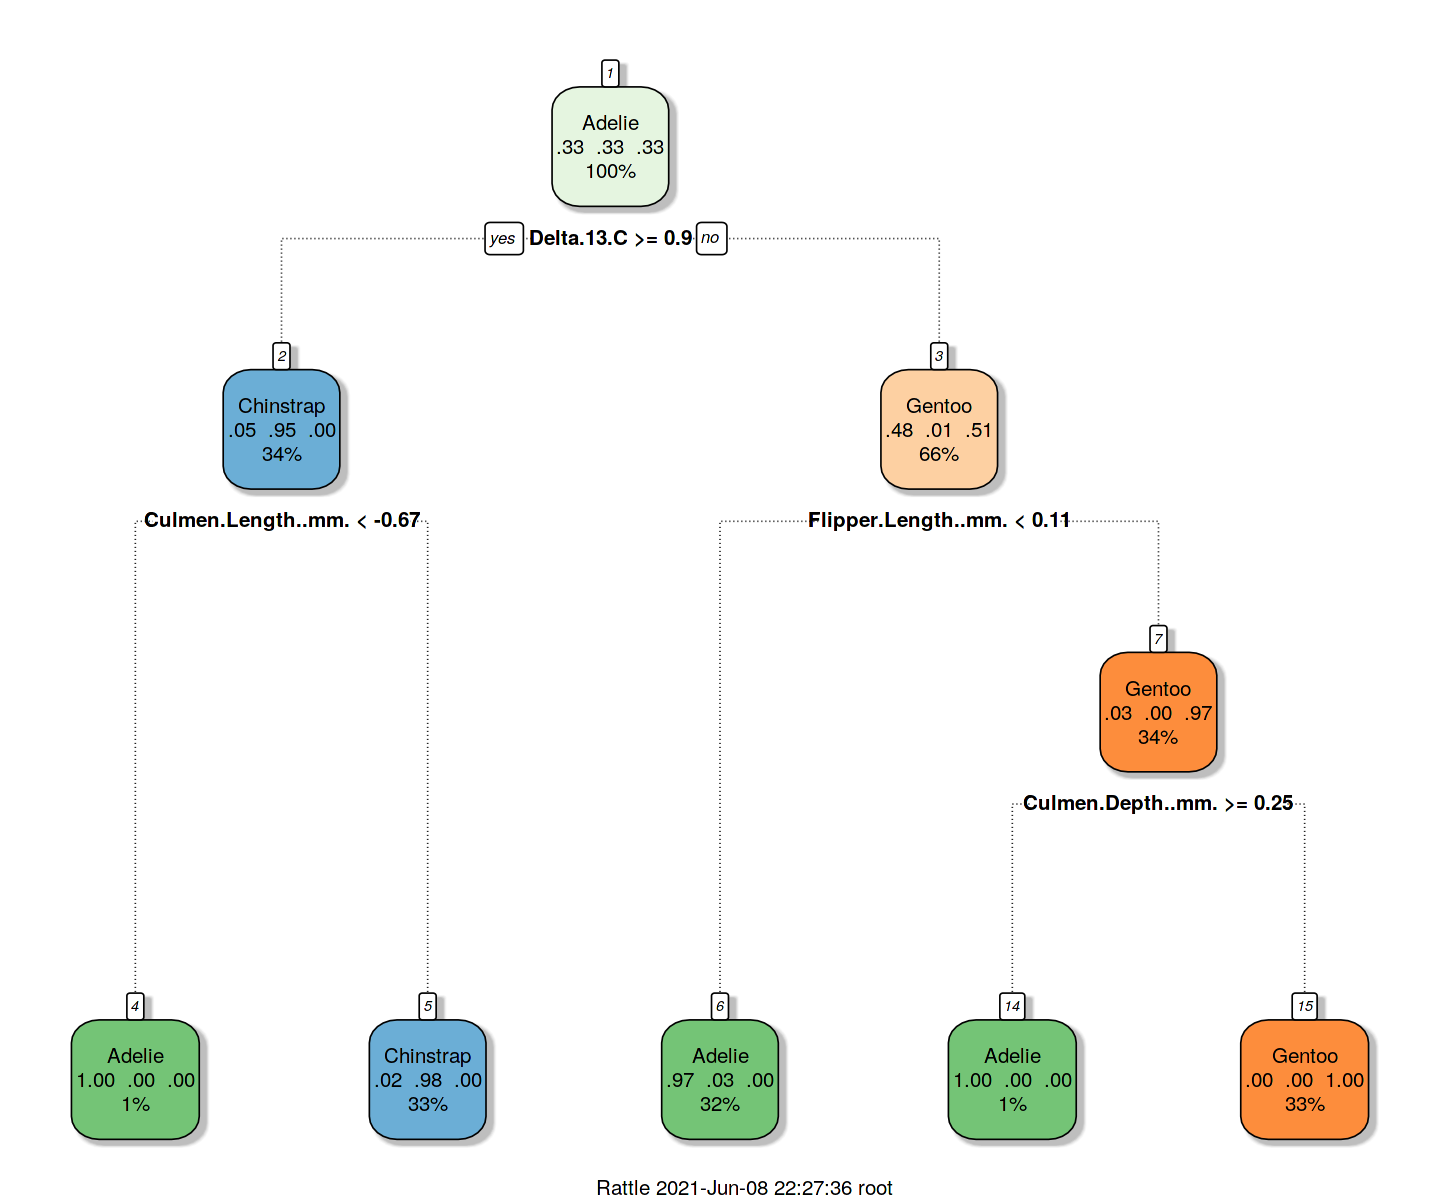

In [47]:
decision_tree_0 <- prune(decision_tree, cp=0)
fancyRpartPlot(decision_tree_0)

We do the same for `cp=1`. We see that we have an errpr from the plotting function that the tree is resumed to the root node. Becauce cp is so strict, no splits are allowed.

In [48]:
decision_tree_1 <- prune(decision_tree, cp=1)
# plot(decision_tree_1)
# Error in plot.rpart(decision_tree_1): fit is not a tree, just a root
# Traceback:

# 1. plot(decision_tree_1)
# 2. plot(decision_tree_1)
# 3. plot.rpart(decision_tree_1)
# 4. stop("fit is not a tree, just a root")

Finally, we plot a chart of the relative error, cp and the size of the tree. We notice that, indeed, the cp that minimized the error is `cp=0`. But, because we also want to reduce overfitting, we choose the cp based on a rule of thumb: *choose the first level where* $xerror < min(xerror) + std(xerror)$. The line the in the plot represents $min(xerror) + std(xerror)$, therefore, we choose the first cp to be under the line: `cp=0.09`. 

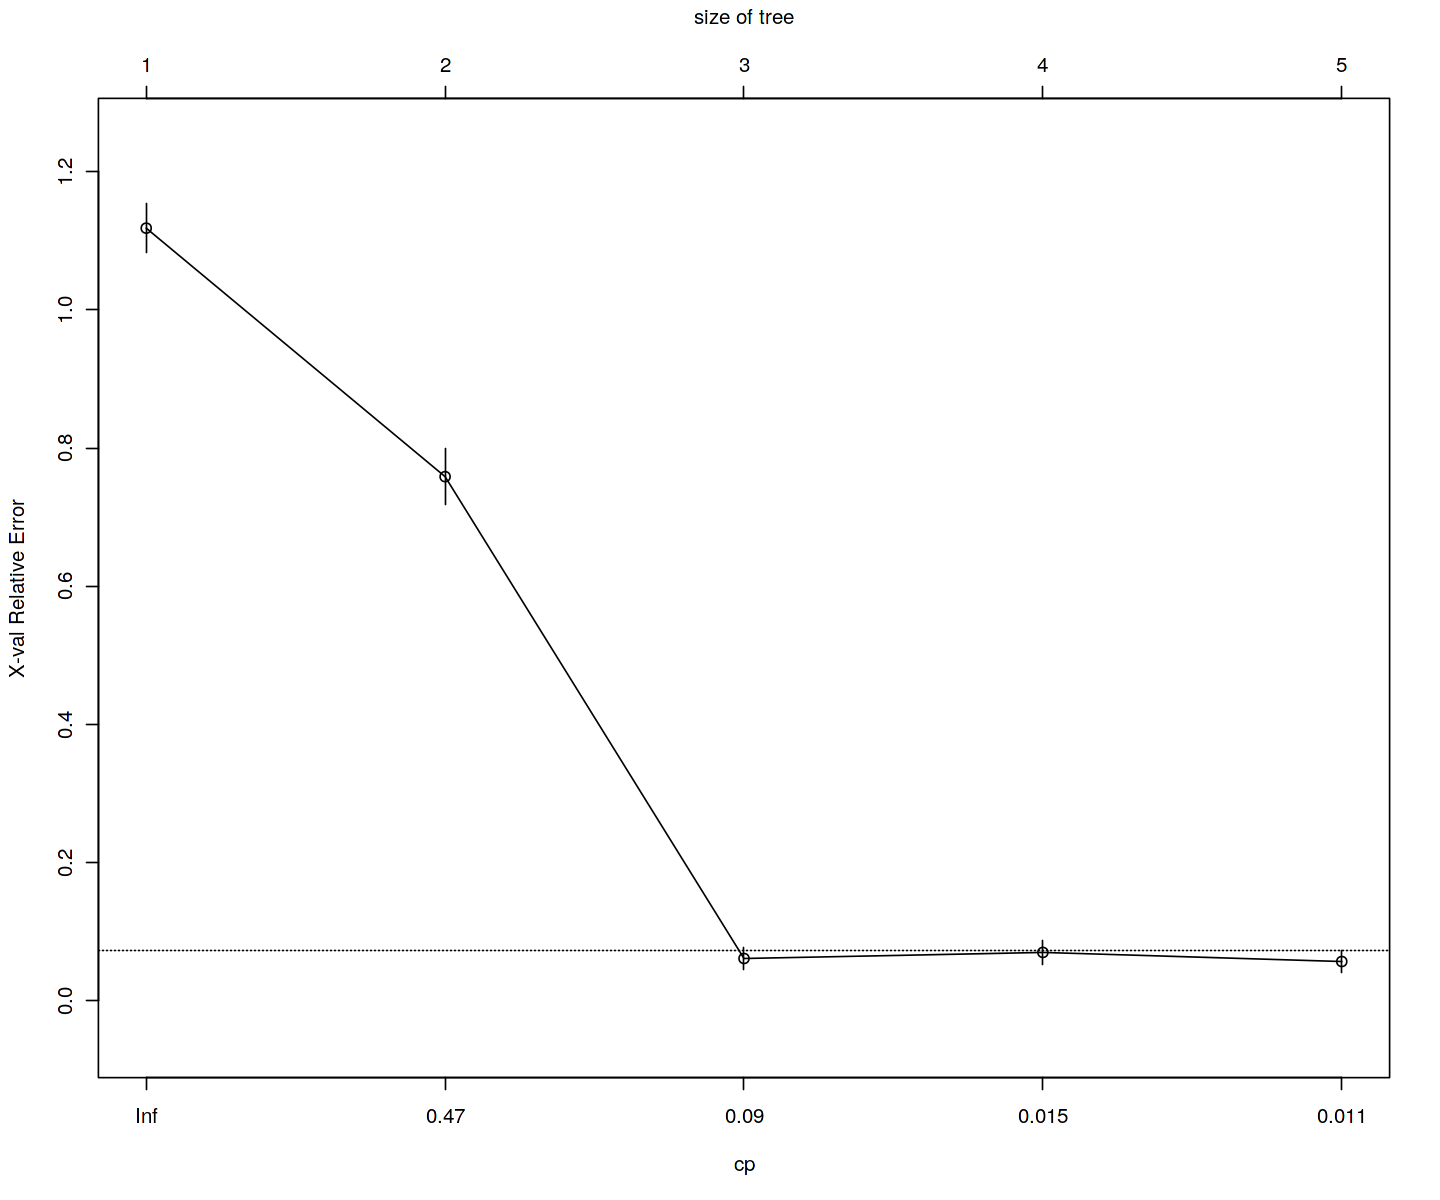

In [49]:
plotcp(decision_tree)

We prune the tree with the chosen cp and show the resulting tree with only 3 terminal nodes.

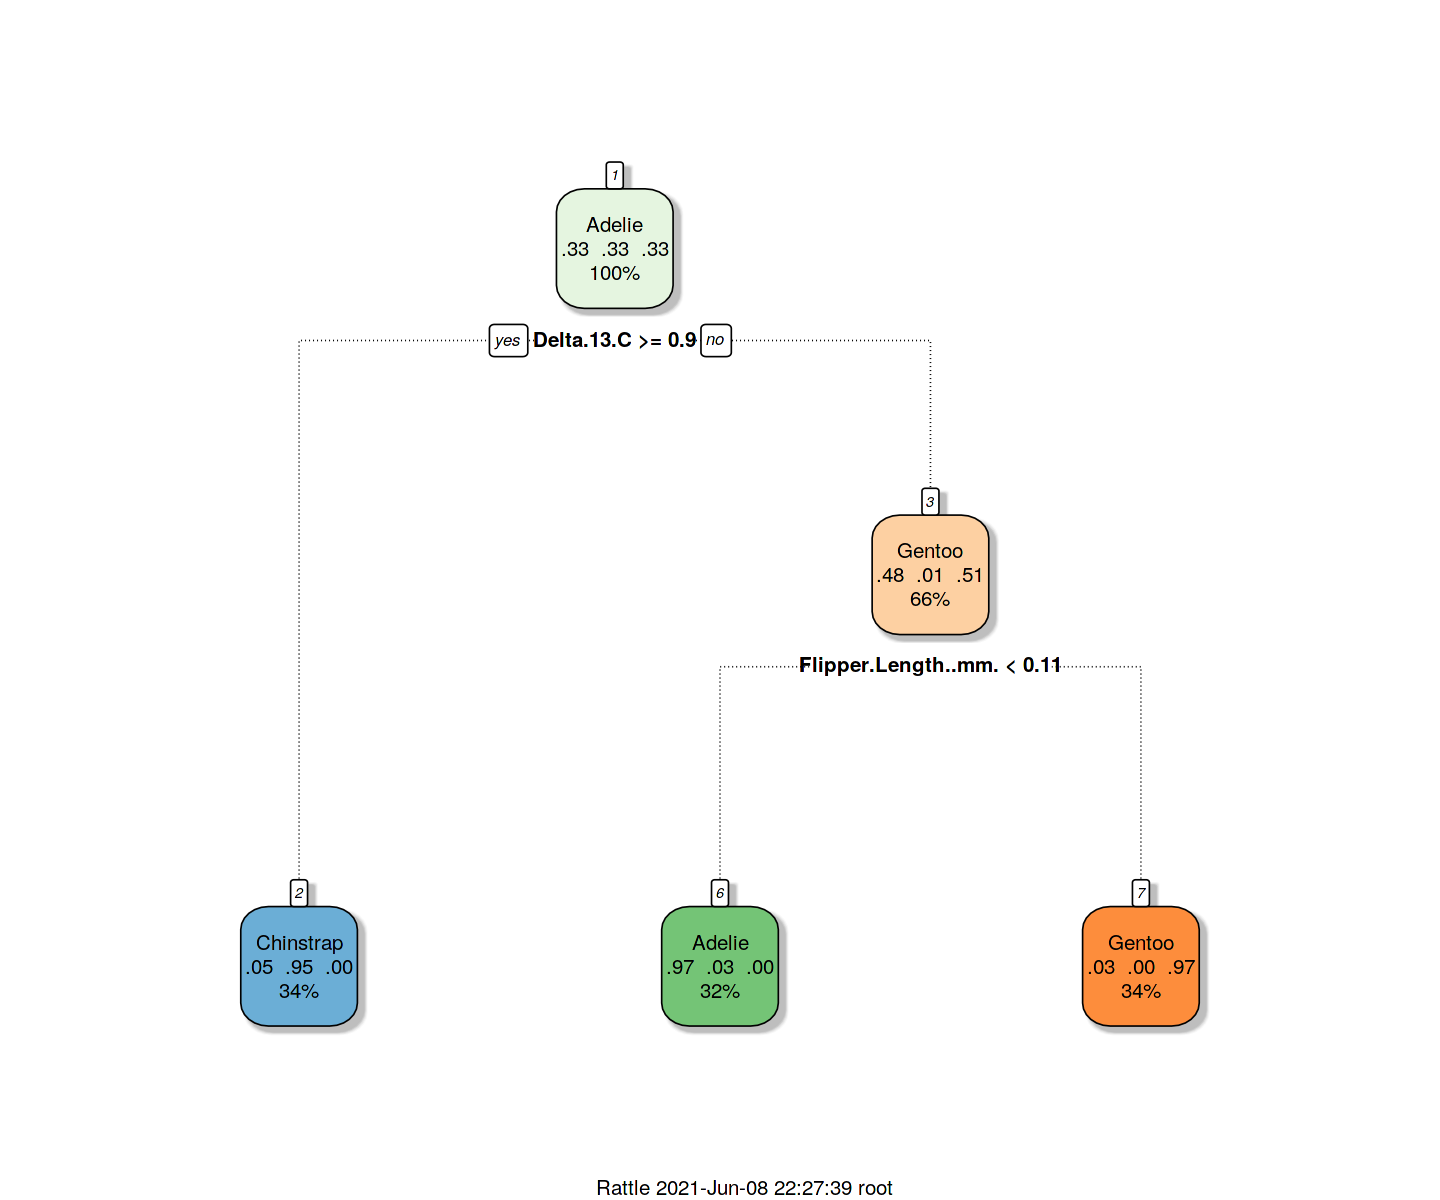

In [50]:
decision_tree <- prune(decision_tree, cp=0.09)
fancyRpartPlot(decision_tree)

Finally, we test the decision tree and compute the confusion matrix.

In [51]:
dt_preds <- predict(decision_tree, newdata = test_data, type = "class")
confusionMatrix(data = dt_preds, test_data$Species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        34         0      0
  Chinstrap      2        17      0
  Gentoo         1         0     30

Overall Statistics
                                          
               Accuracy : 0.9643          
                 95% CI : (0.8992, 0.9926)
    No Information Rate : 0.4405          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9446          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.9189           1.0000        1.0000
Specificity                 1.0000           0.9701        0.9815
Pos Pred Value              1.0000           0.8947        0.9677
Neg Pred Value              0.9400           1.0000        1.0000
Prevalence                  0.4405        

We obtain 96.43% accuracy with 3 misclassifications.

### Random Forest
---

Random Forest is an ensemble of decision trees where the classification is given by a voting between the predictions of each tree of the ensemble. This algorithm is based on the assumption that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The key factor is that the trees have to be uncorrelated, that is, that have to commit different mistakes. To assure that, two strategies are used: training the trees on different subsamples of the data and a subsample of the features. The `mtry` algorithm that is tuned by `caret` refers to the number of features randomly sampled at each tree, therefore, it can range from 2 to the number of features (8). In the following, we will train a random forest tuned with all 7 possible values for `mtry`.

In [52]:
rf <- train(Species ~ .,
                data = train_balanced, 
                method = "rf", 
                trControl = fit_control,
                metric = "Accuracy",
                tuneLength = 7)
rf

Random Forest 

342 samples
  8 predictor
  3 classes: 'Adelie', 'Chinstrap', 'Gentoo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 308, 307, 308, 306, 308, 308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9920726  0.9881091
  3     0.9894156  0.9841219
  4     0.9862139  0.9793146
  5     0.9859193  0.9788698
  6     0.9844655  0.9766921
  7     0.9818427  0.9727553
  8     0.9818338  0.9727406

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

We observe that `mtry=2` was the best value for this parameter with an accuracy of 99.27% on trained data. So we test the random forest with `mtry=2` for the test data.

In [53]:
rf_preds <- predict(rf, newdata = test_data)
confusionMatrix(data = rf_preds, test_data$Species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        37         0      0
  Chinstrap      0        17      0
  Gentoo         0         0     30

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.957, 1)
    No Information Rate : 0.4405    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4405           0.2024        0.3571
Detection Rate              0.

We observe that on the test data, we achieve 100% accuracy.

### SVM
---


Lastly, we train a support vector machines classifiers (SVC or SVM). The SVMs takes advantage of kernels to separate and classify data by defining hyperplanes in higher dimensional spaces. The algorithm defines the hyperplane, or decision boundry, by maximizing the distance of the closest points with respect to the hyperplane.

In the following, we train an SVM using the `caret` package and radial kernel, which is the most commonly used. The `caret` package tunes two parameters of the SVM: C and sigma (more commonly knonw as gamma).

The parameter C indicates how much we care about misclassifications. For large values of C, the algorithm will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the algorithm to look for a larger-margin separating hyperplane, even if that causes more misclassifications.

The parameter sigma determines the reach of each training sample with regards to the boundry. For low values of sigma, every train sample will reach the boundry. For high values of sigma, only values close to the boundry will reach it, and consequently, only these values will influence the boundry.

In [54]:
svm <- train(Species ~ .,
                data = train_balanced, 
                method = "svmRadial", 
                trControl = fit_control,
                metric = "Accuracy")
svm 

Support Vector Machines with Radial Basis Function Kernel 

342 samples
  8 predictor
  3 classes: 'Adelie', 'Chinstrap', 'Gentoo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 309, 308, 308, 307, 309, 308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9970578  0.9955842
  0.50  0.9970578  0.9955842
  1.00  0.9970578  0.9955842

Tuning parameter 'sigma' was held constant at a value of 0.2021733
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2021733 and C = 0.25.

We observe that the sigma value is estimates through an heuristic while the C value is tuned with grid search. Next, we test the model with the best parameters found.

In [55]:
svm_preds <- predict(svm, newdata = test_data)
confusionMatrix(data = svm_preds, test_data$Species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        37         0      0
  Chinstrap      0        17      0
  Gentoo         0         0     30

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.957, 1)
    No Information Rate : 0.4405    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4405           0.2024        0.3571
Detection Rate              0.

We observe an accuracy of 100% in the test set.

### Models comparison
---

We have obtained the highest accuracy in the test data with the SVM with radial kernel and with the Random Forest algorithm. Because we have observed that in different runs, the accuracy of the Random Forest varies while the SVM maintains stable, and because of the better explainability, we choose the SVM model for the classification task.

### Chosen Model Analysis: Support Vector Machine (SVM)

The Support Vector Machine methodology is sound for any number of dimensions, but becomes difficult to visualize for more than 2 features. In order to better understand the general idea and principle of SVM we will first try to provide a graphical representation of this technique on our data. Therefore it first requires to reduce the number of dimensions. Notice that the following experiment is just for the **purpose of visualization and algorithm understanding since it does not consider parameter optimization and does not distinguish between training, validating and testing data**.

#### SVM visualization in 2 dimensions by applying PCA

In order to plot a graphical representation we must reduce the number of dimensions of our data. For this purpose we will apply the PCA technique and see how it fits our data. PCA is a linear dimensionality reduction technique that will reduce the data and separate it in an unsupervised manner by maximal variance.



In [56]:
pca <- prcomp(numeric_data)
summary(pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6
Standard deviation     14.6142 4.04811 1.54861 0.59466 0.41330 0.31845
Proportion of Variance  0.9167 0.07034 0.01029 0.00152 0.00073 0.00044
Cumulative Proportion   0.9167 0.98702 0.99731 0.99883 0.99956 1.00000

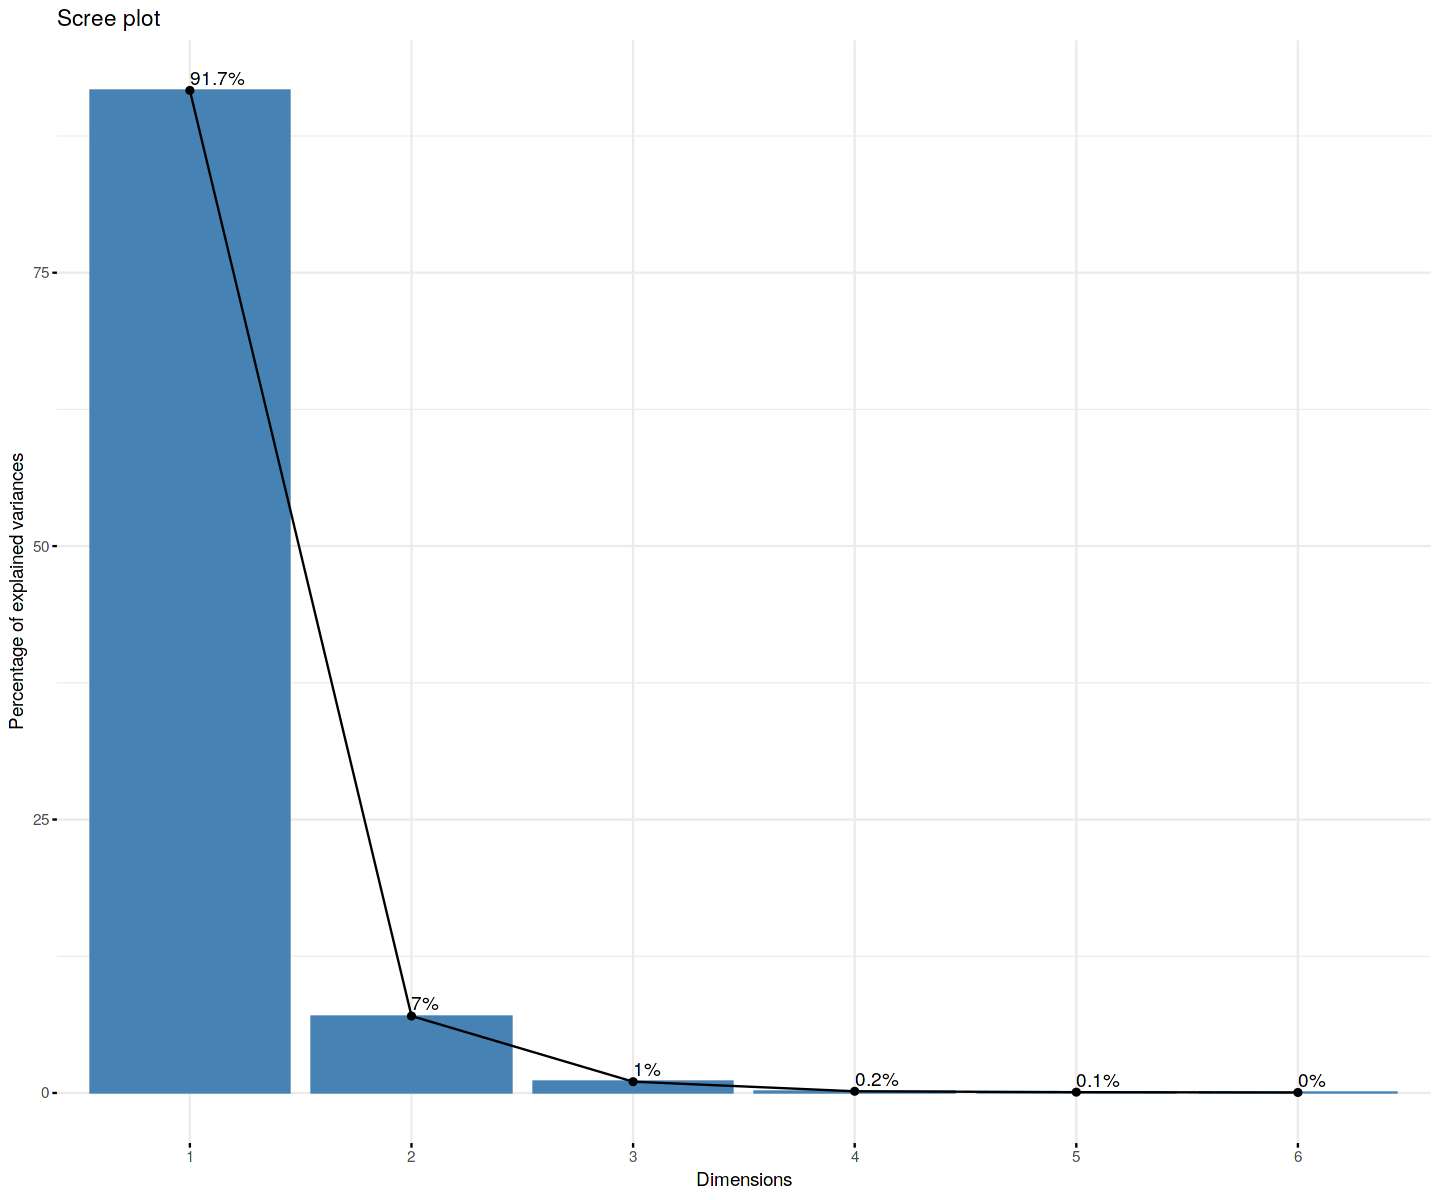

In [57]:
fviz_eig(pca, addlabels=TRUE)

The graph just above shows that we can save the vast majority of the information (91.7%) by keeping only 1 dimension. With 2 dimensions we are able to save almost all the information (91.7% + 7% = 98.7%). We can therefore conclude that it definitely makes sense to create our SVM model based on only 2 dimensions which will allow us to plot a graphical representation in 2D. Let's first plot a graph showing our data with the first two principal components (2D plot) colored based on the species.

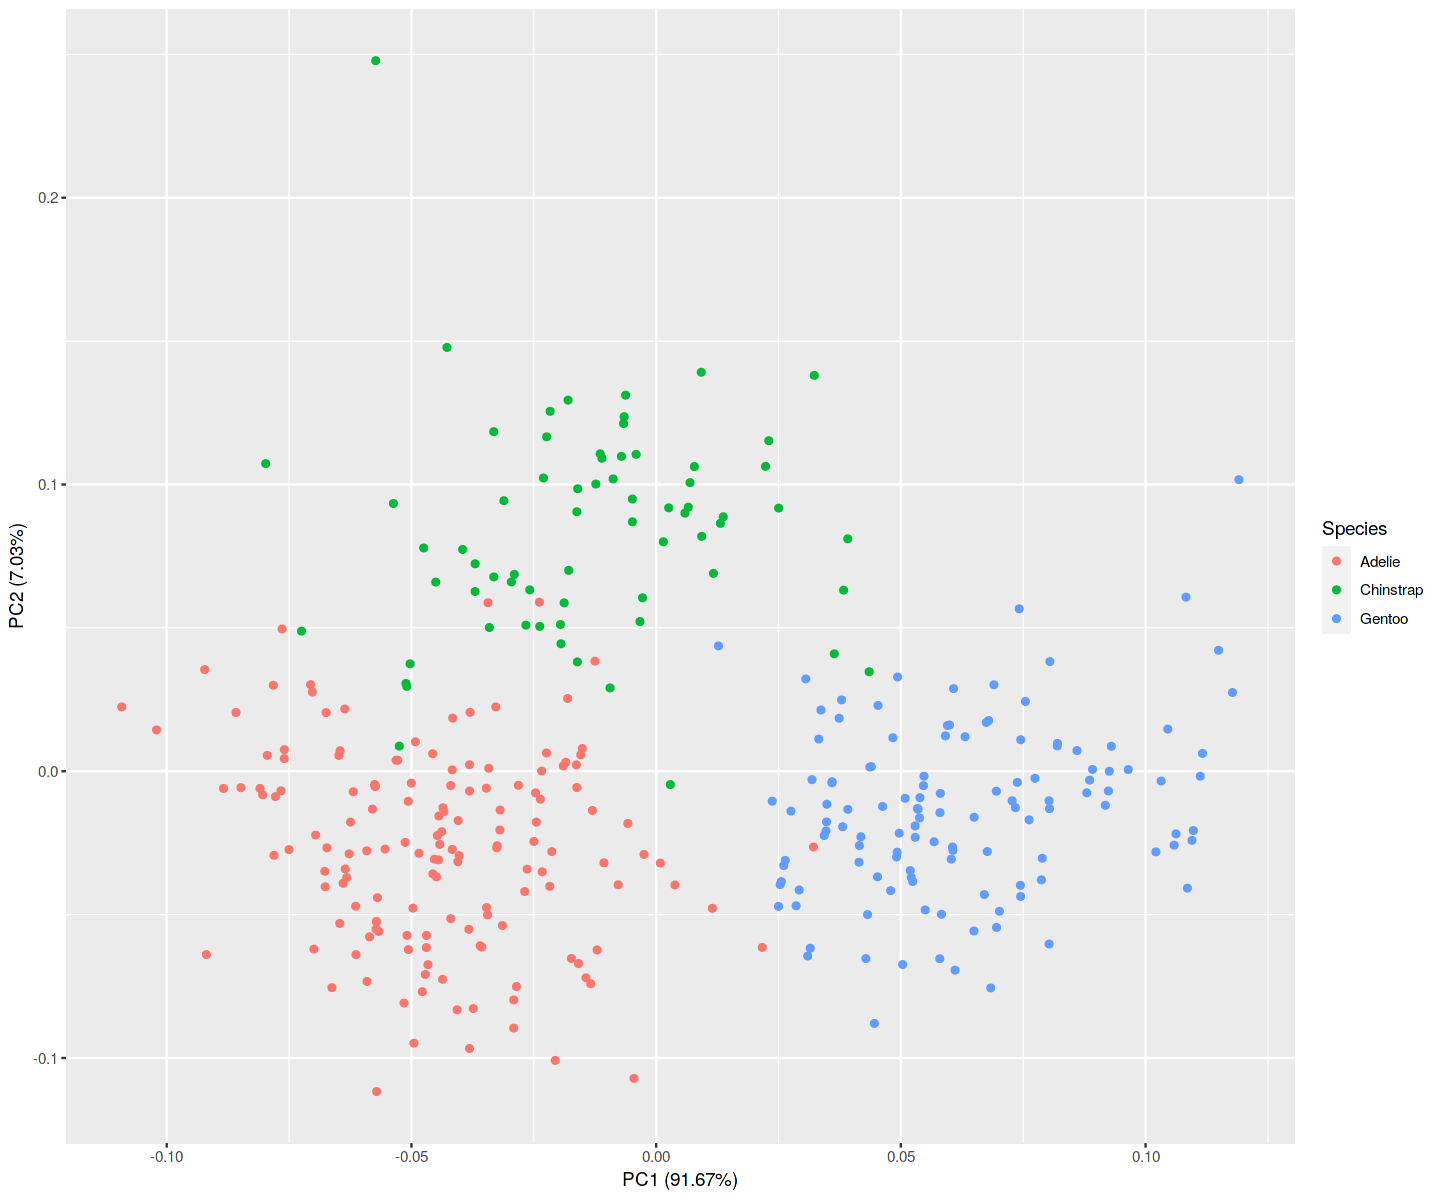

In [58]:
autoplot(pca, data=data, colour = 'Species')

The plot above allows us to see that the first two principal components should be enough to effectively classify the species because the points belonging to a same specie are "grouped" together. Let's now create a svm model based on these two principal components.

In [59]:
Species <- data$Species
pcadata <- data.frame(Species, pca$x[,1], pca$x[,2])
svm.pca <- svm(Species ~ ., data = pcadata, kernel = "radial")

Because our svm model is now based on 2-dimensional data we are able to plot a graphical representation of it.

In the plot, the points are colored depending on the class to which they belong. We notice that some points are classifier together with points of other color, that is, they are misclassified. The number of misclassifications allowed to maximize the distance from the points to the boundery is controlled by the C parameter.

The points that are represented by an “X” are the support vectors: the points that directly affect the classification line. The points marked with an “O” are the other points, which don’t affect the calculation of the line. This principle will lay the foundation for support vector machines. The reach of the support vectors is controlled by the sigma parameter.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier by using a loss function called "hinge loss". Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM. 

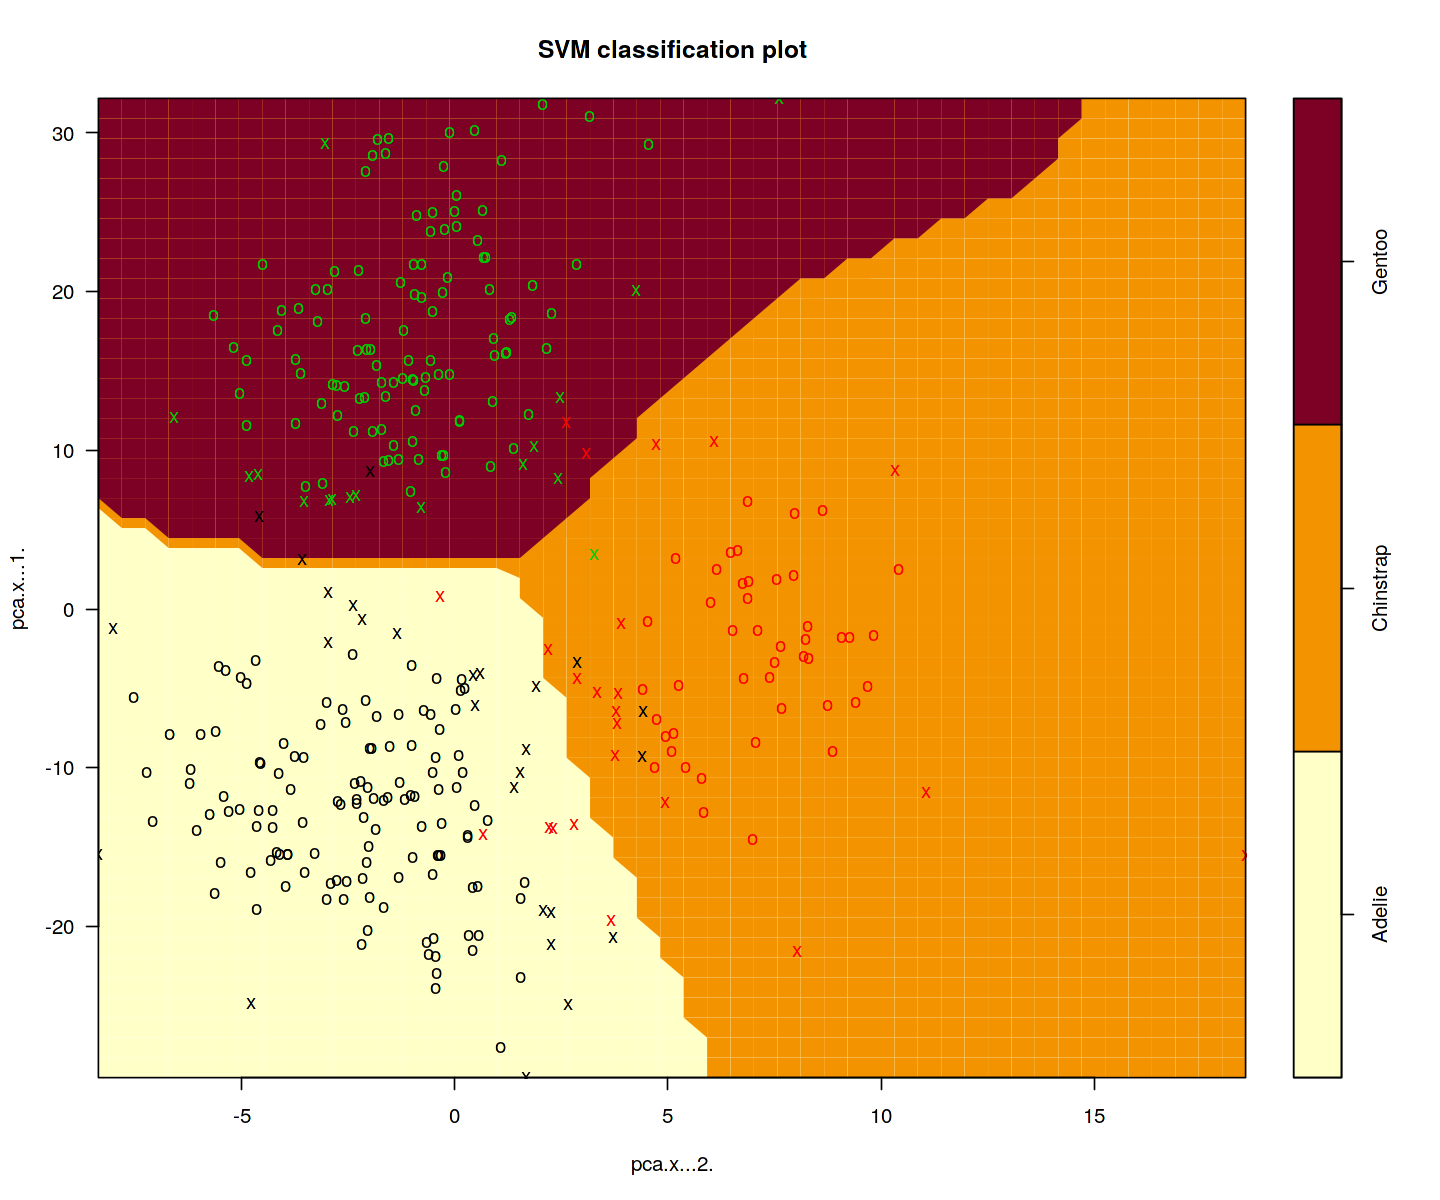

In [60]:
plot(svm.pca, data = pcadata)